In [1]:
from utilities import *

In [2]:
############### User Configuration ###############
##################################################

datadir = "." # All ZDA files in this directory + subdirectories are loaded
selected_filename = "05_01_05" # focus for subsequent analysis

# Spatial area to investigate
y_range = [45,-2] #[10, 40]
x_range = [0,-2] #[41, 79]

# Temporal area to investigate
time_window = [40,-1]

In [3]:
############## Driver script: begin ##############
##################################################

# Load data
processed = [] # to avoid re-processing later
all_data = load_all_zda(data_dir=datadir + "/zda_targets")

# Selected data of interest
for file in all_data:
    if selected_filename in file[0]:
        selected_filename = file[0]
        
raw_data = all_data[file[0], 'data']
meta = all_data[file[0], 'meta']
rli = all_data[file[0], 'rli']
        

./zda_targets/05_01_05.zda
Number of files loaded: 1


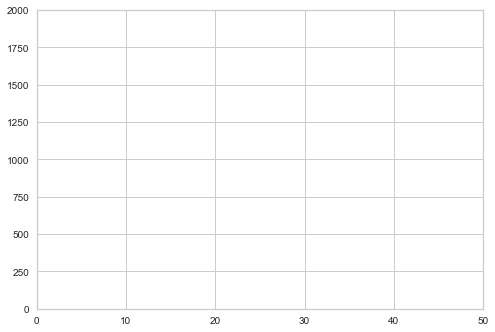

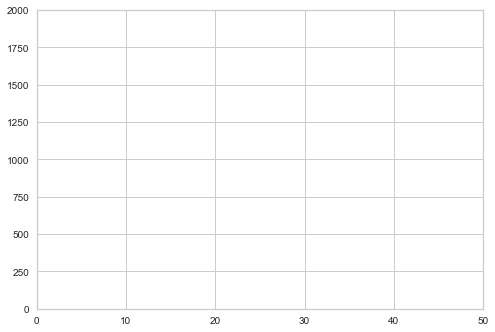

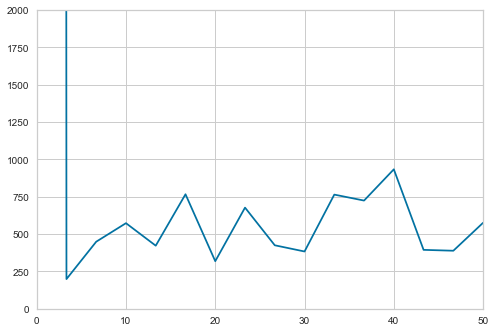

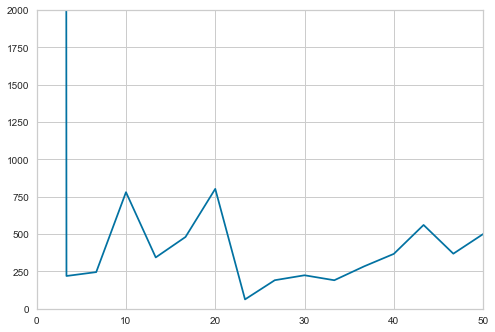

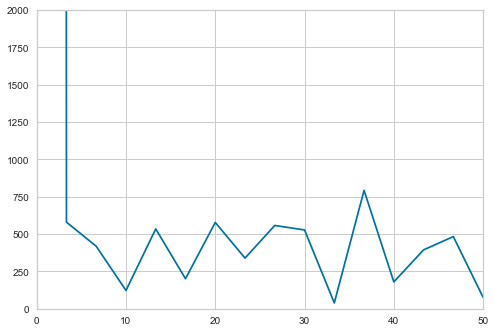

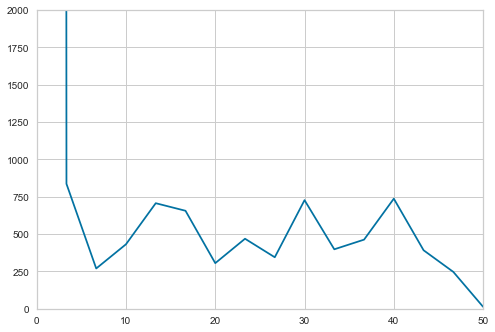

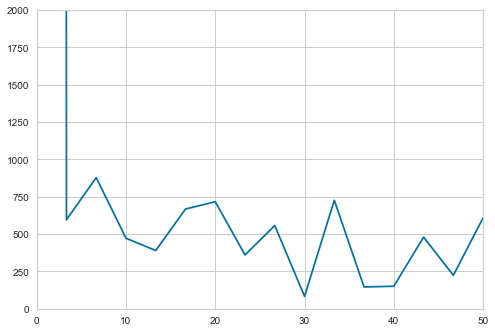

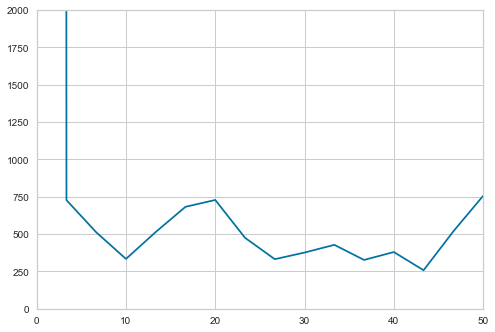

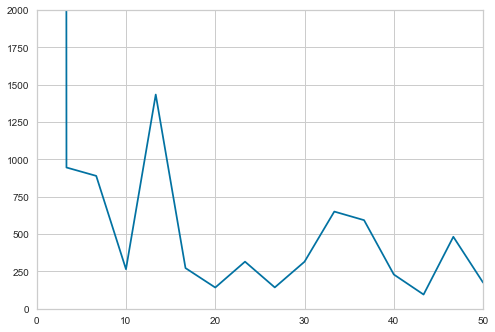

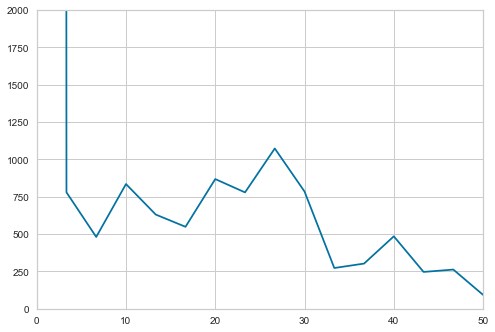

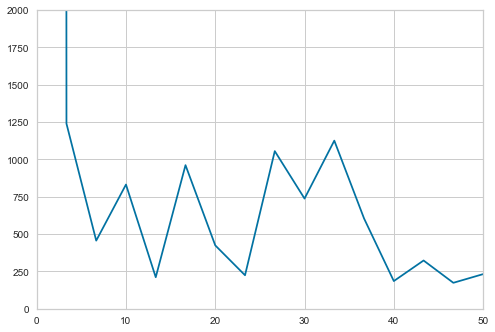

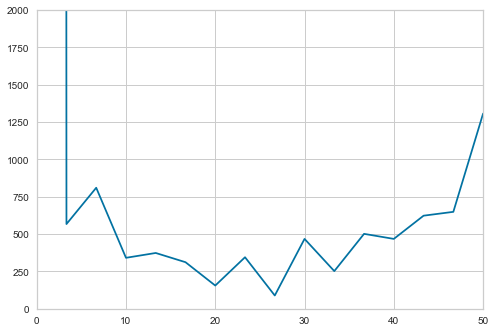

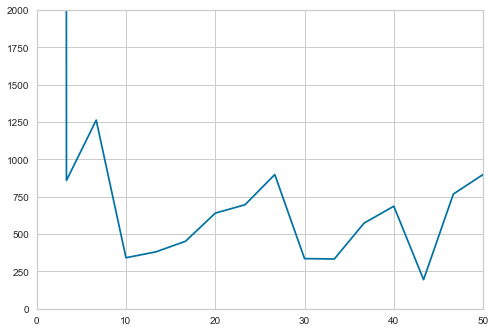

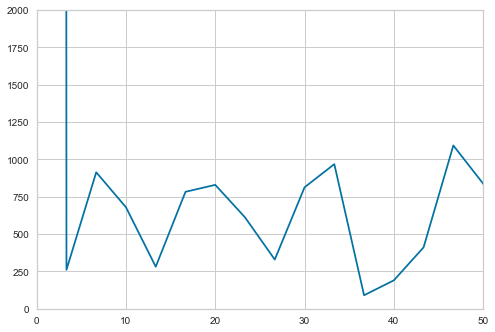

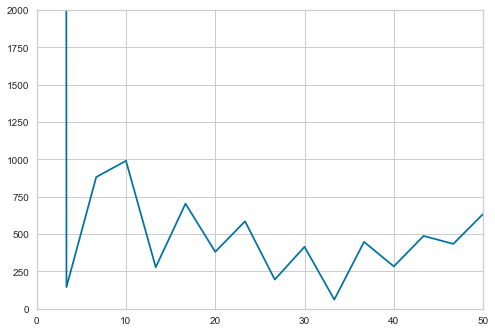

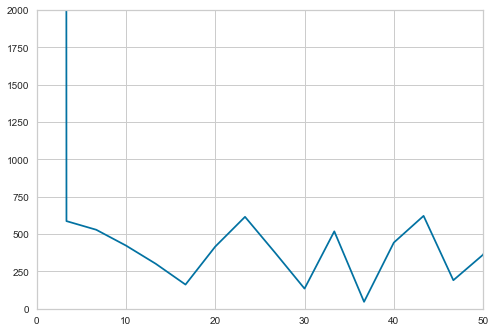

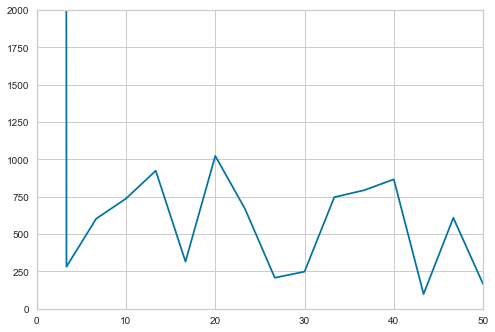

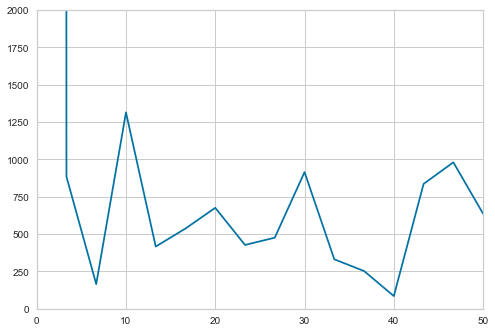

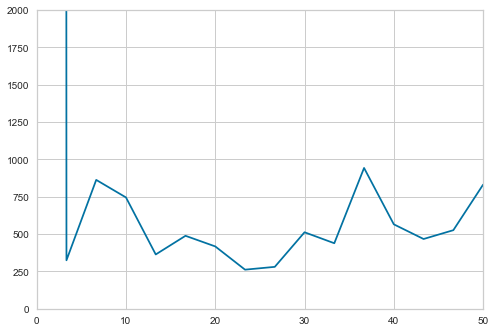

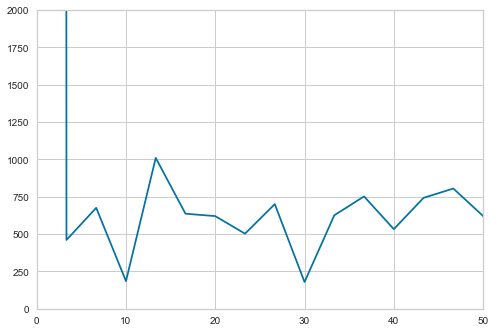

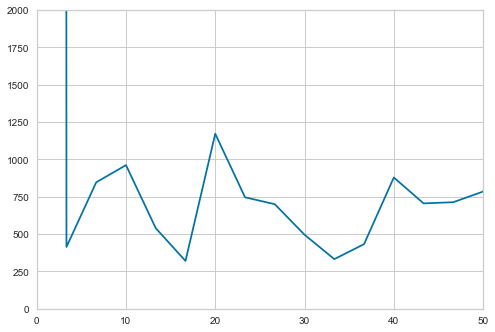

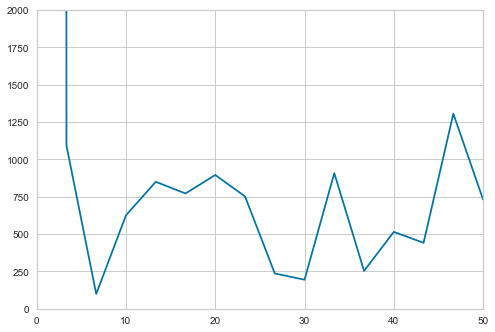

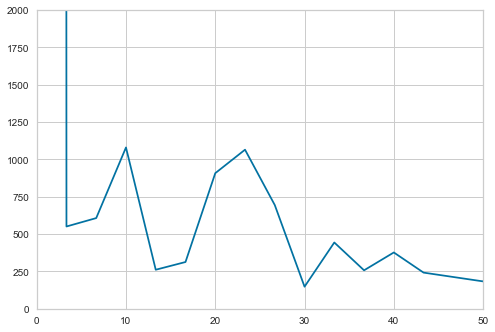

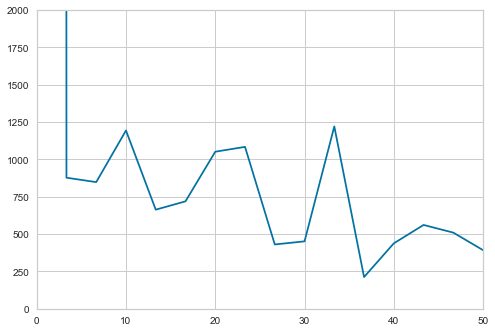

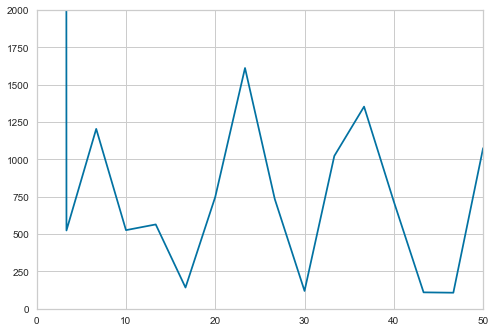

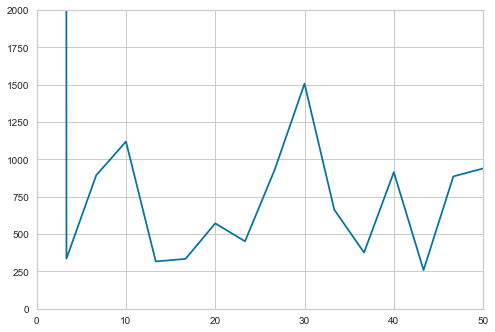

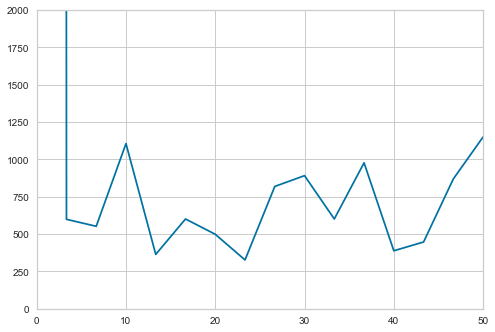

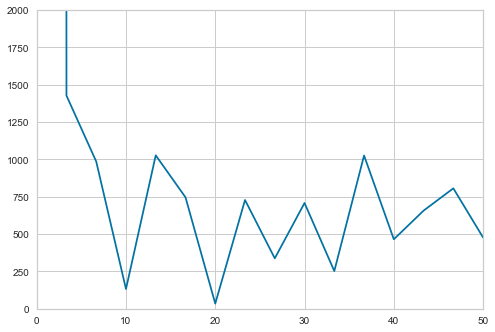

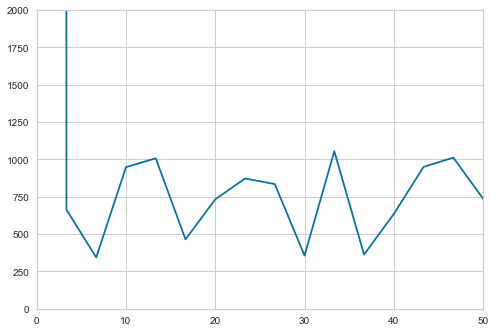

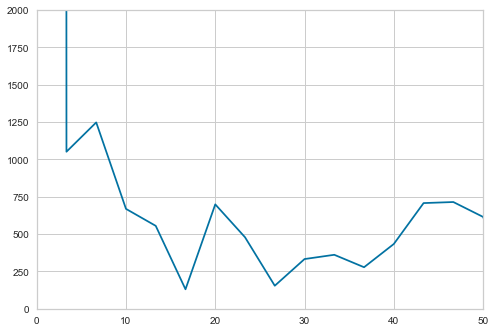

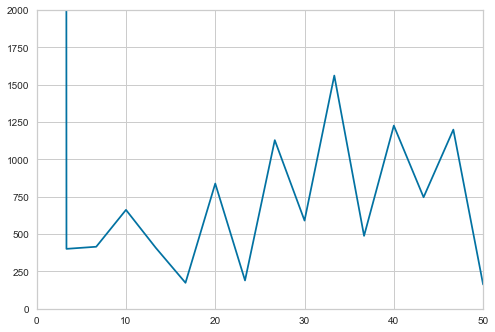

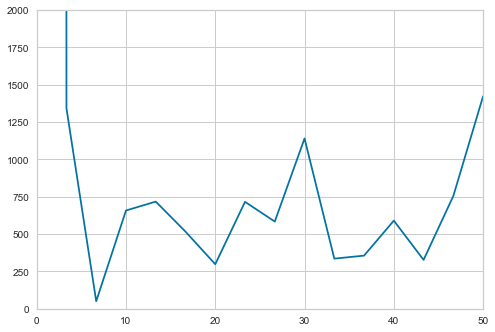

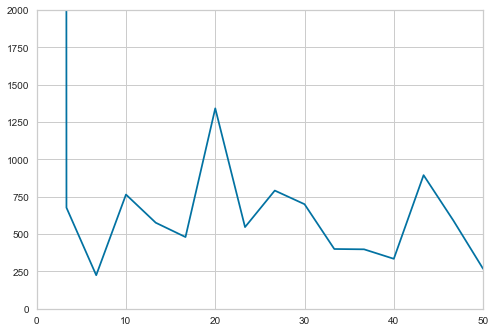

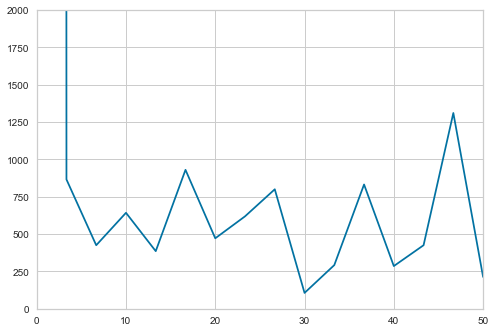

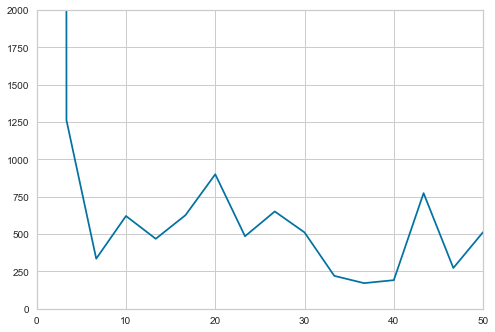

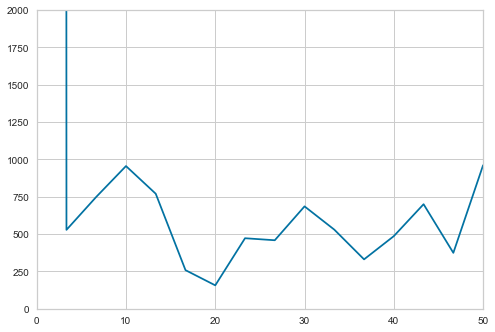

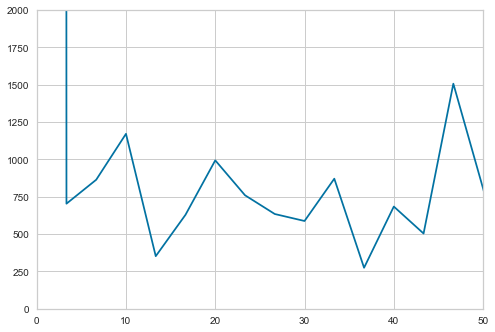

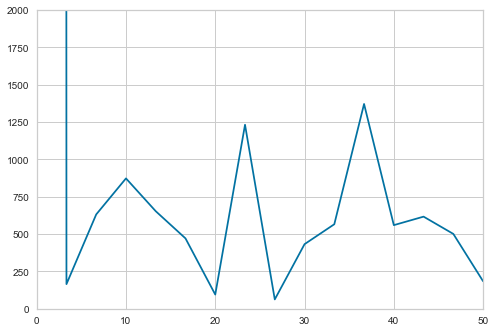

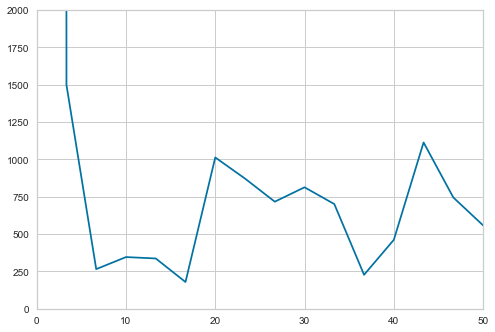

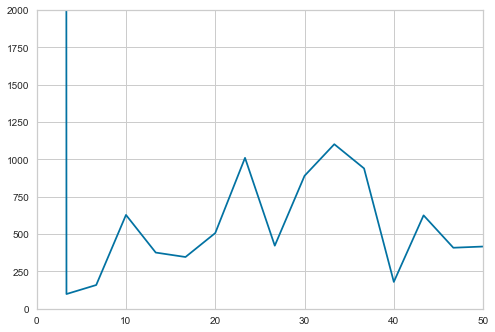

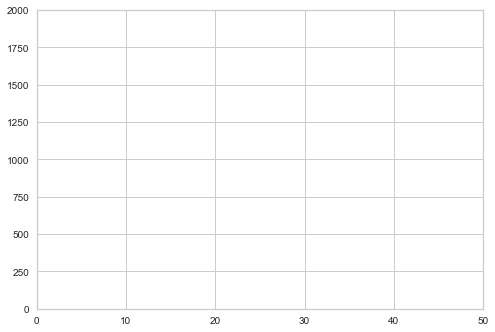

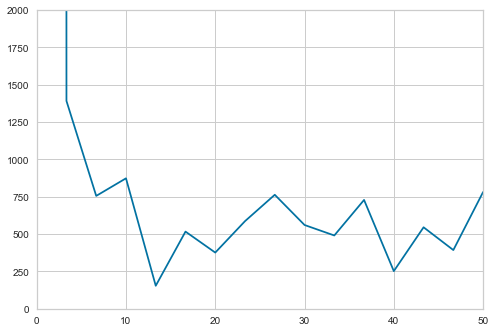

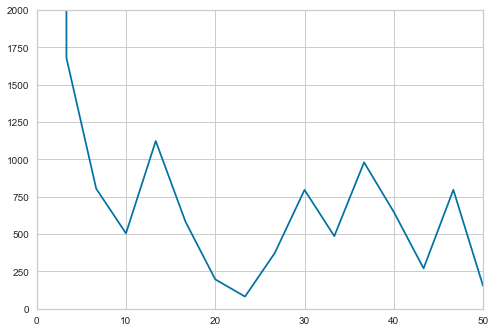

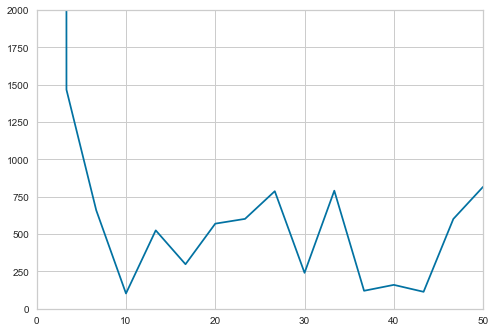

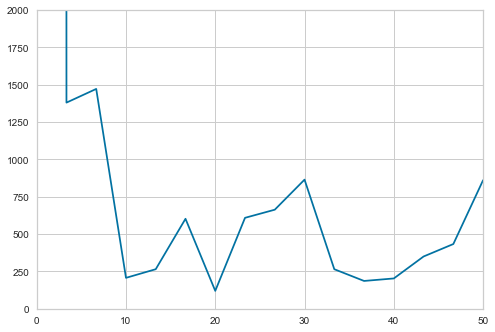

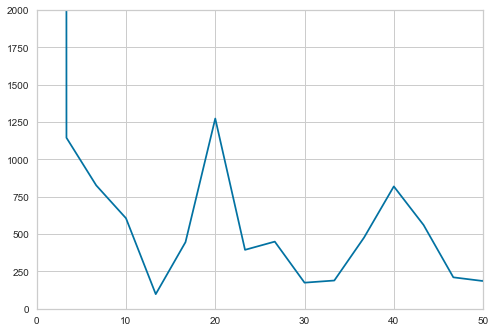

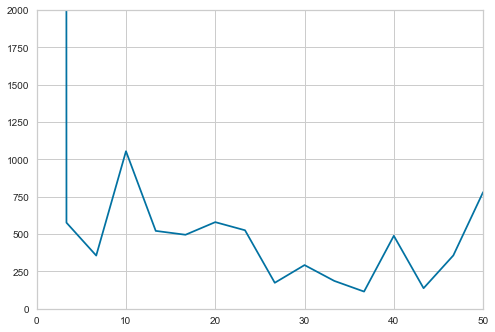

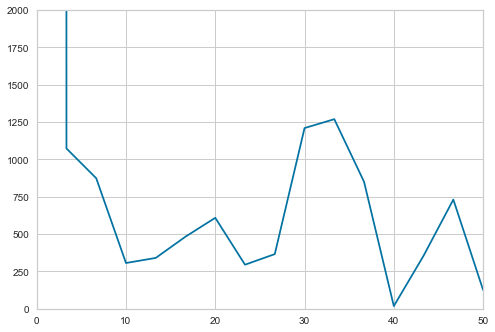

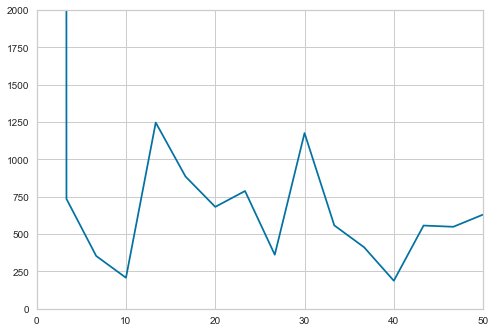

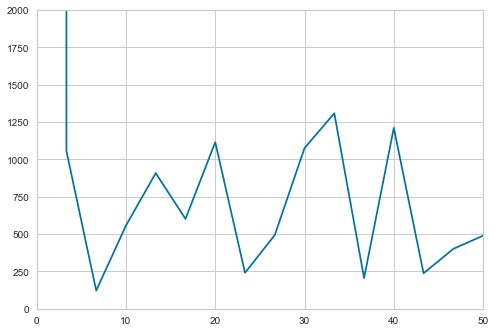

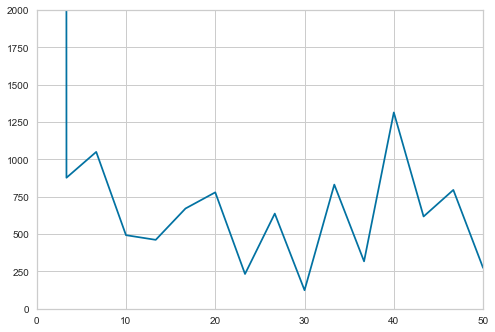

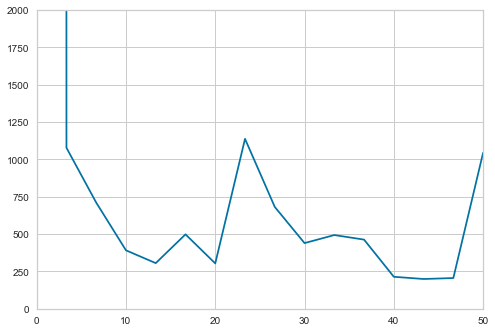

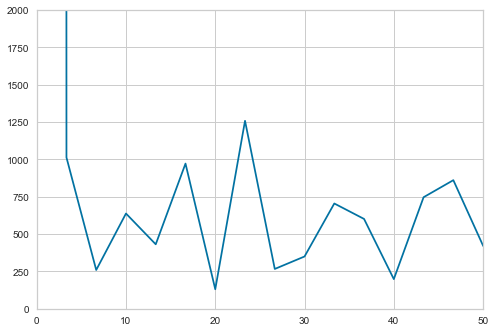

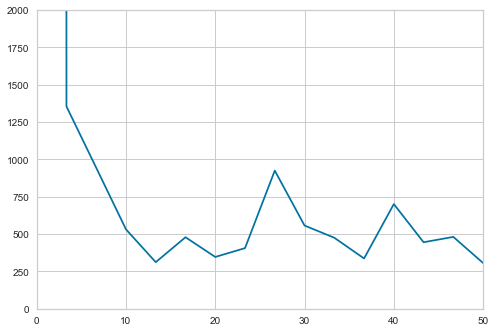

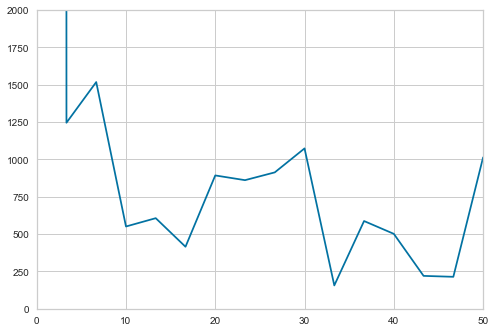

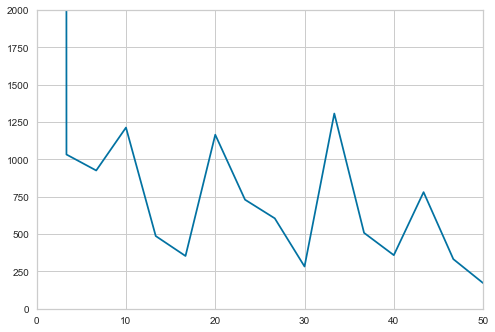

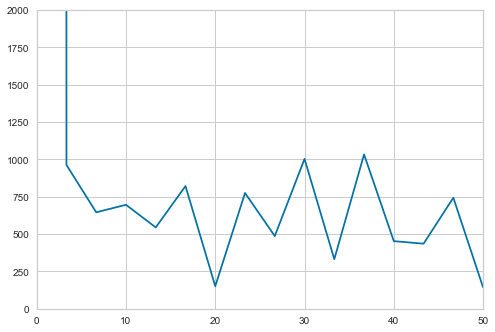

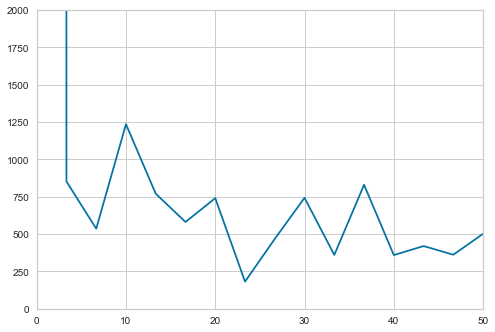

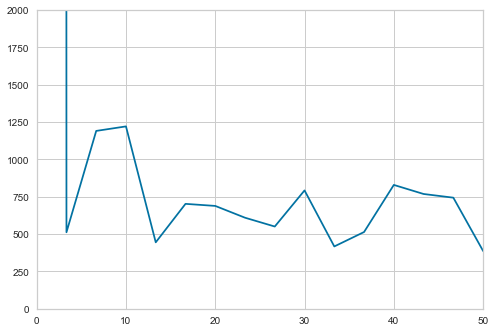

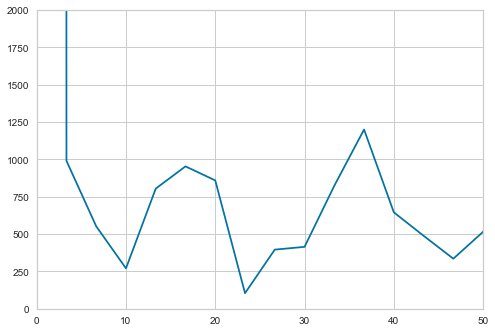

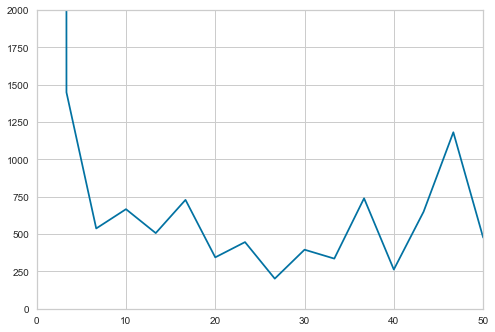

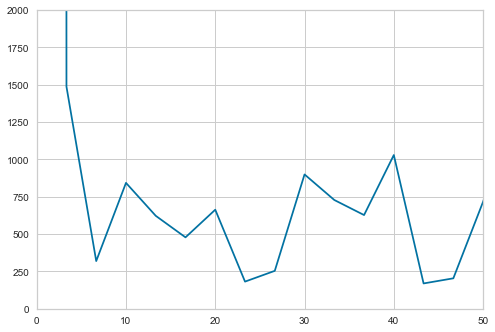

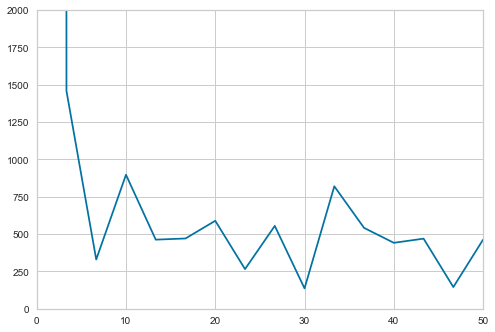

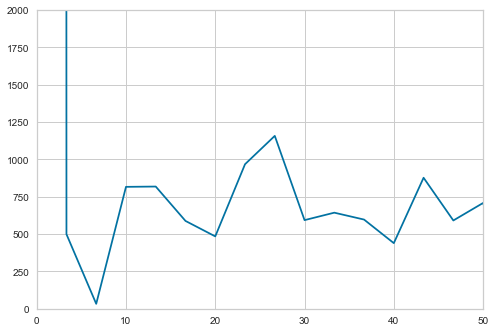

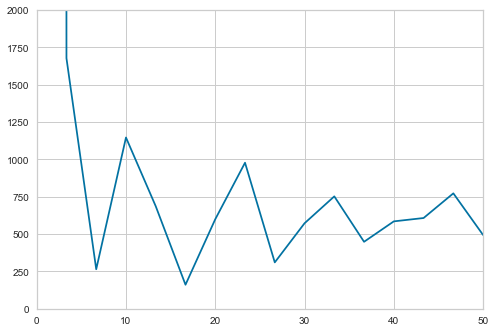

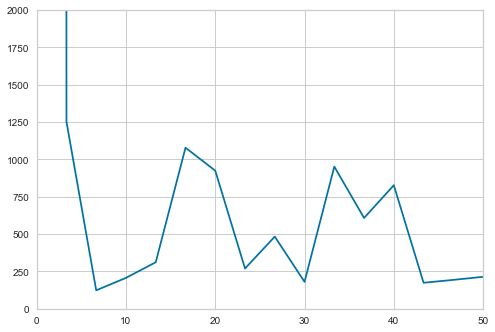

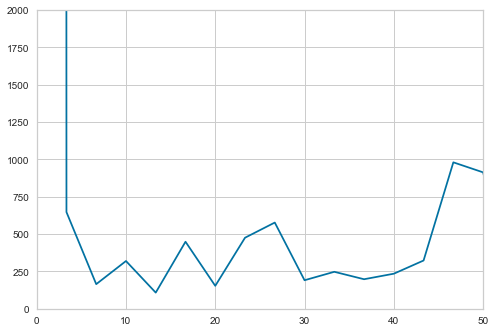

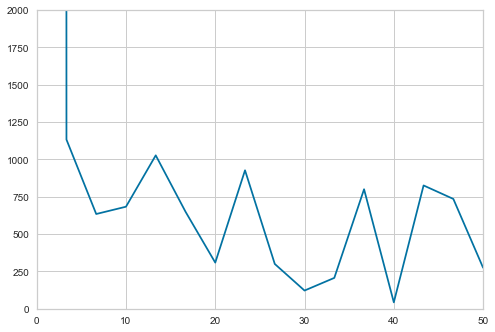

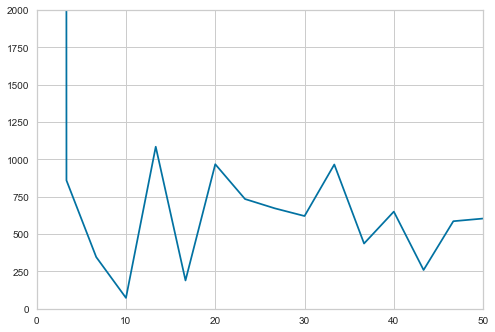

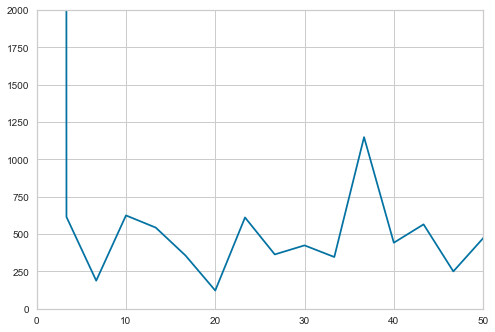

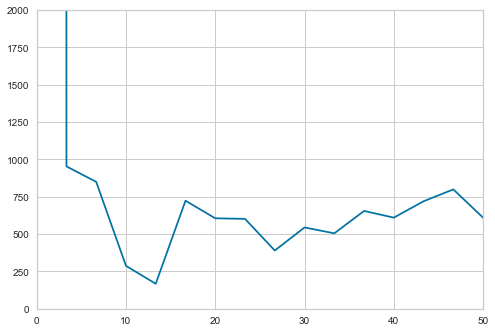

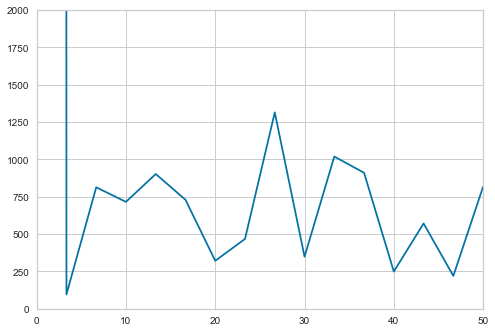

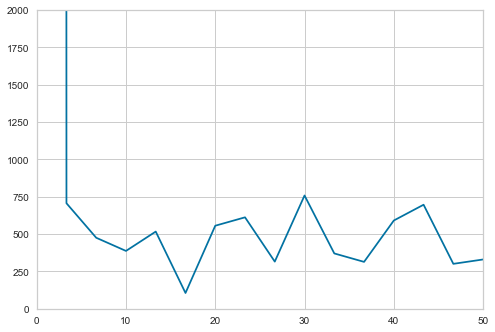

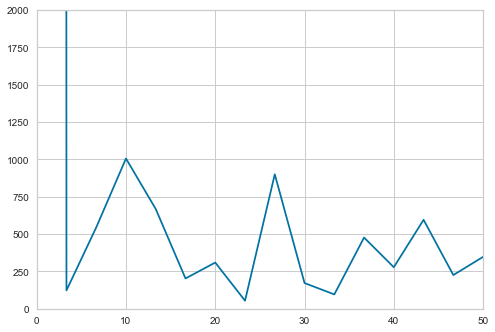

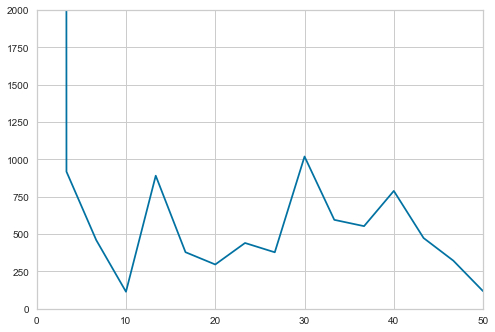

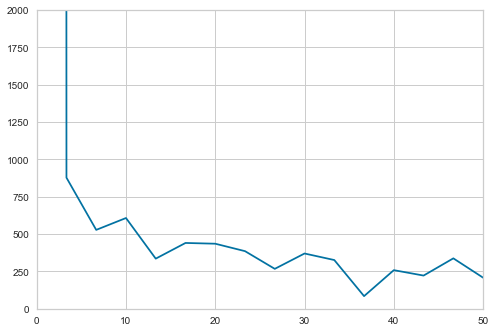

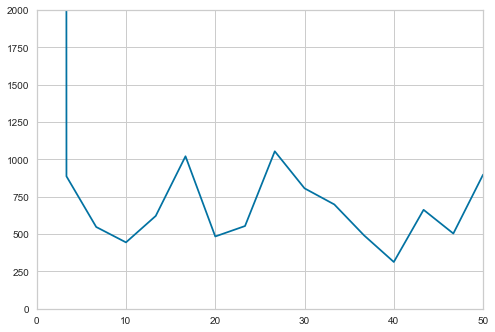

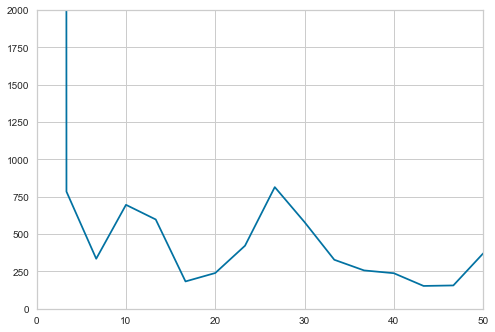

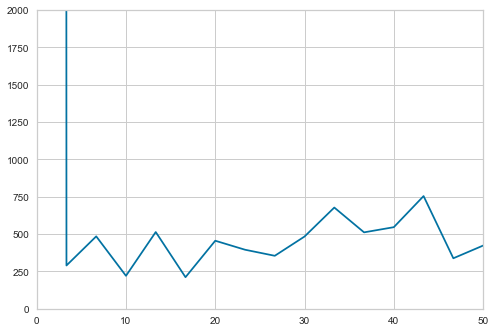

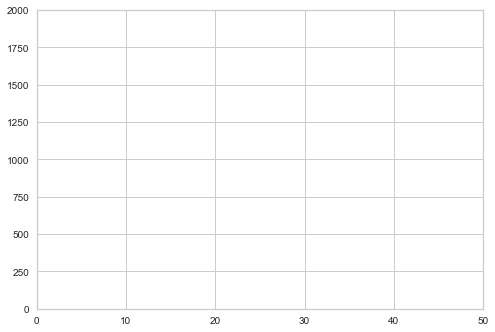

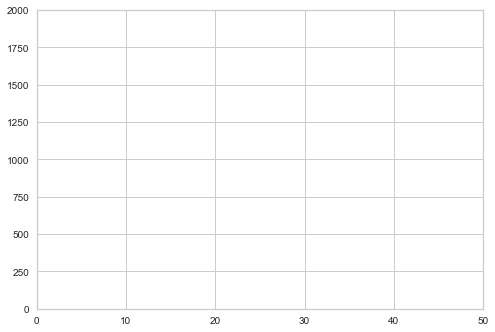

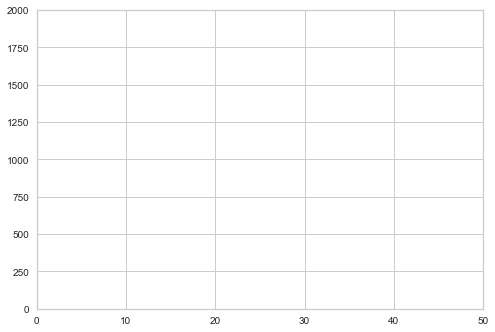

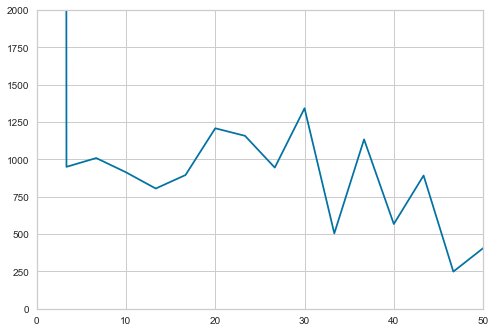

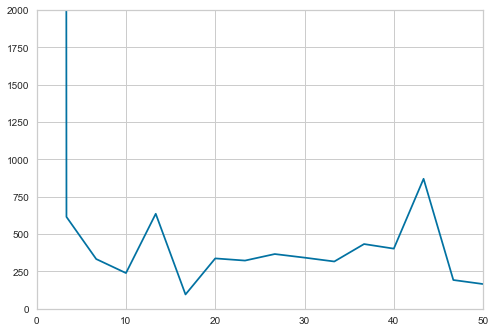

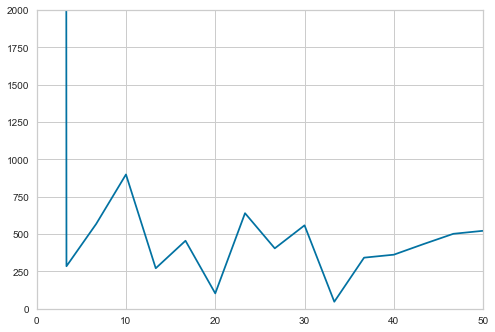

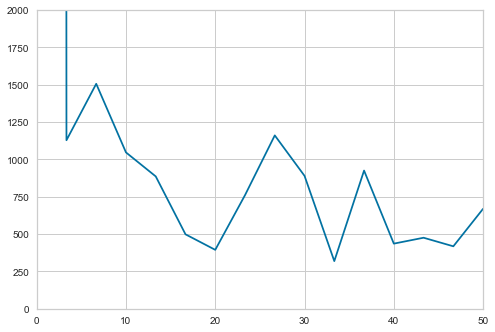

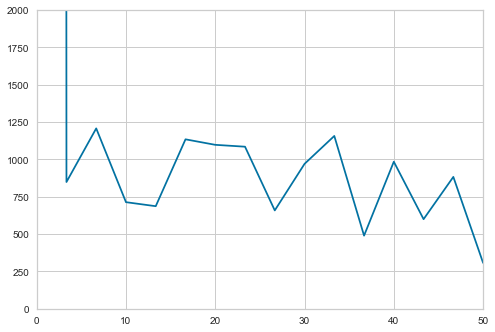

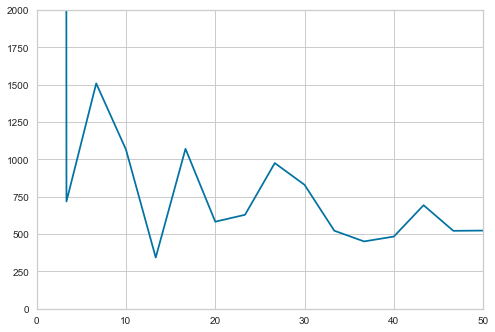

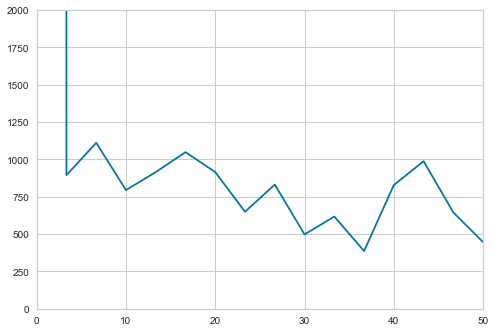

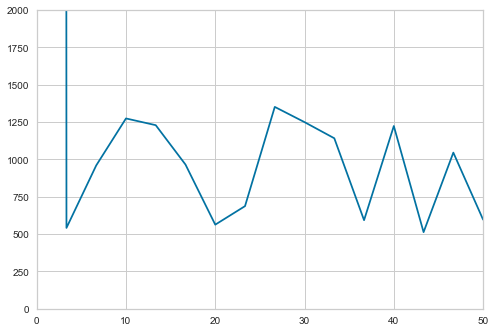

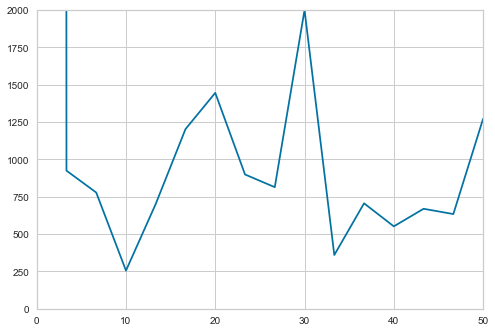

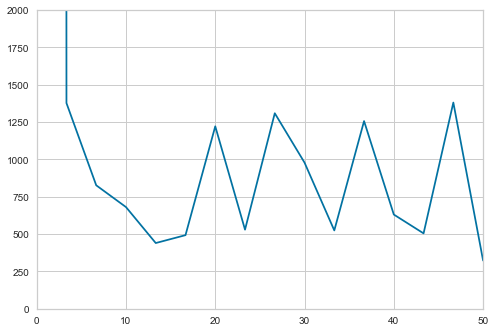

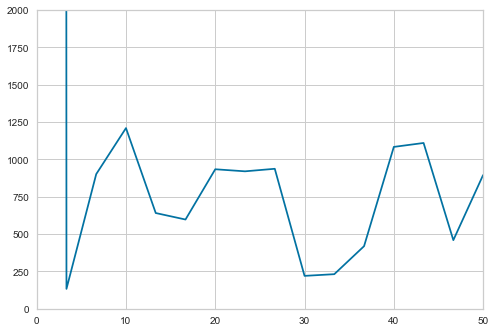

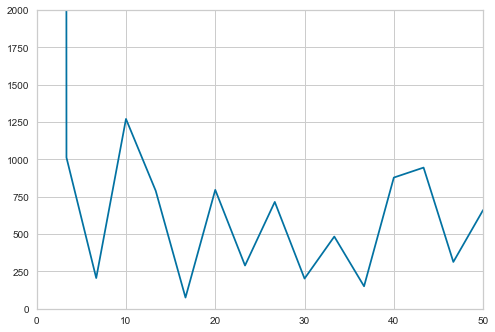

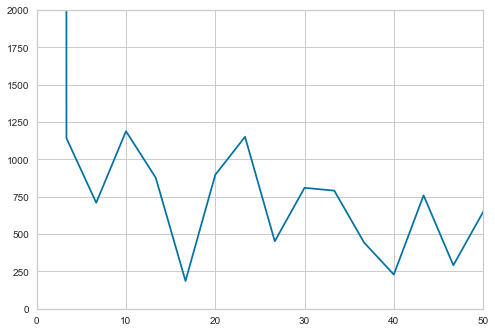

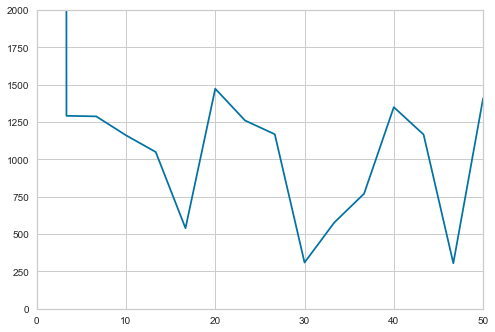

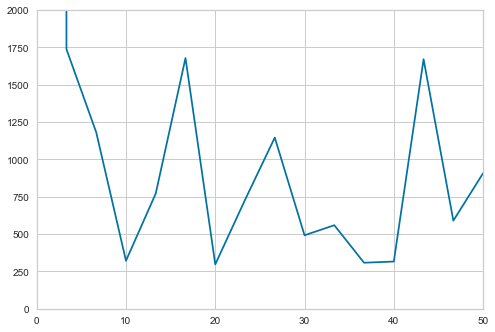

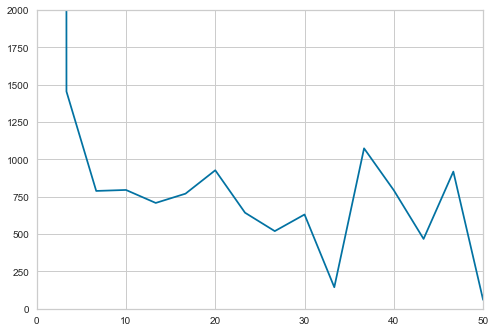

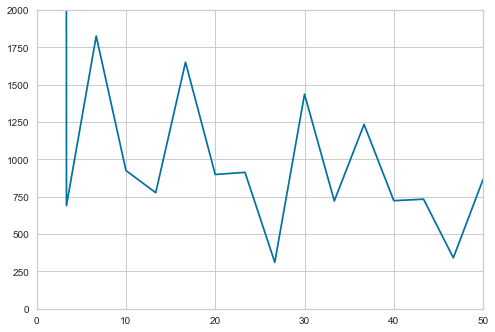

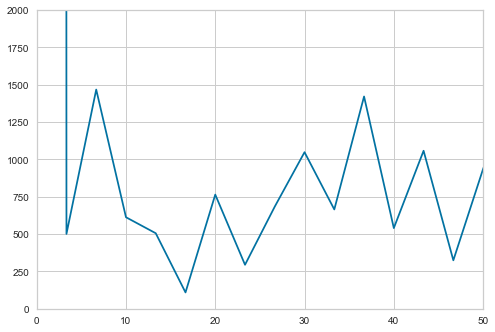

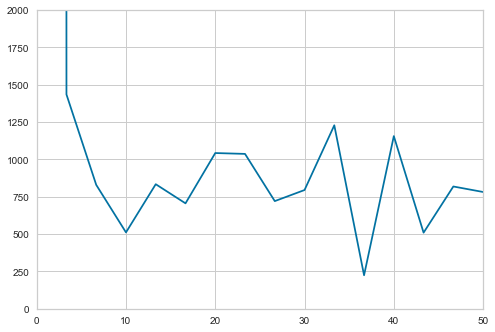

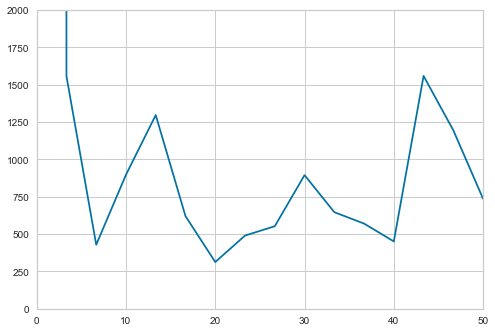

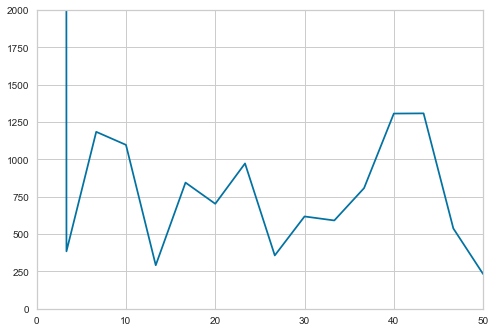

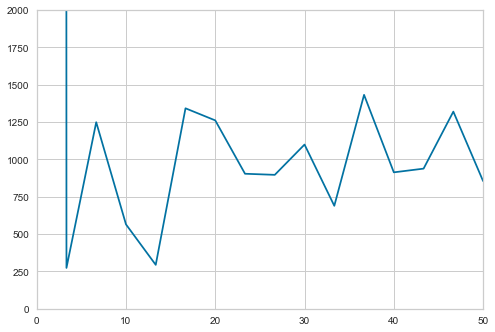

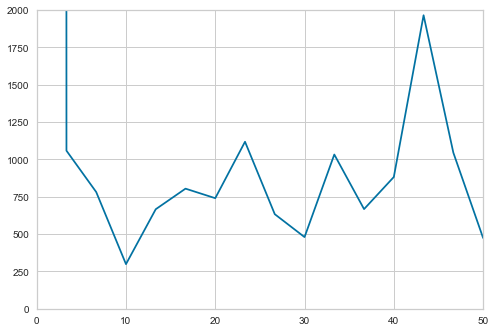

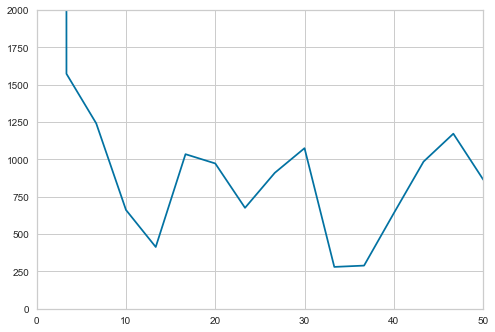

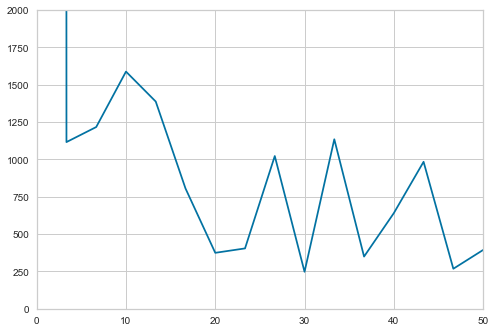

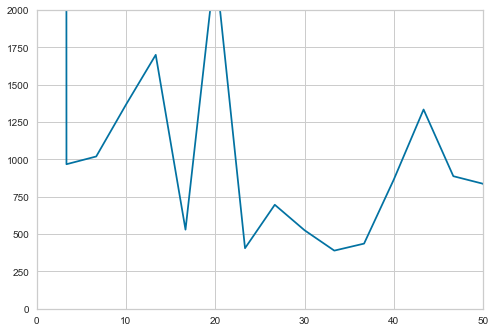

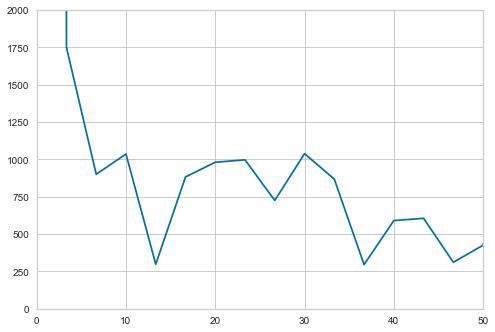

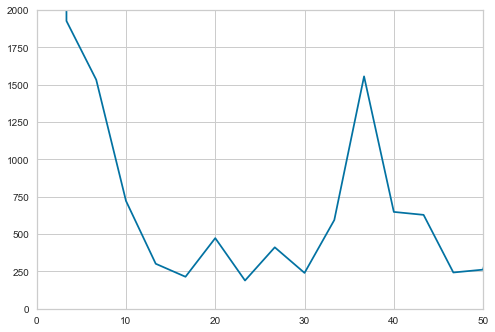

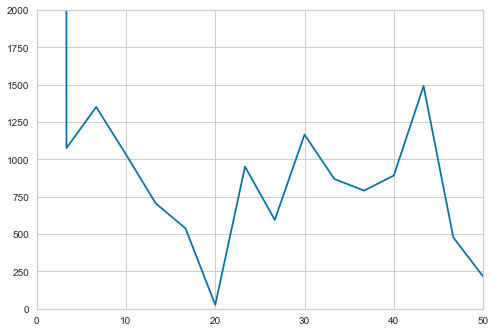

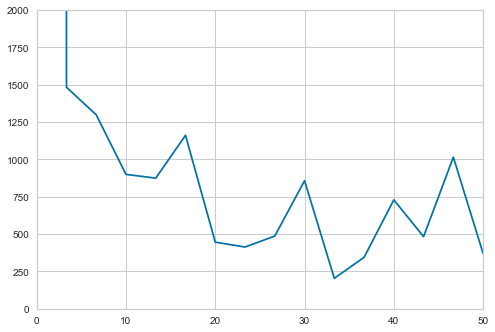

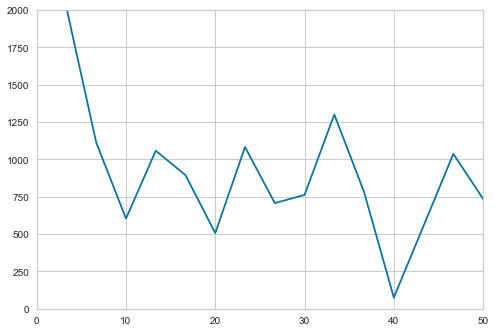

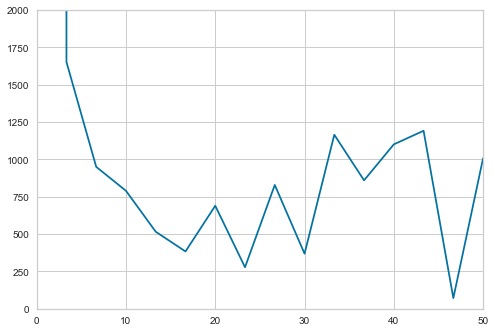

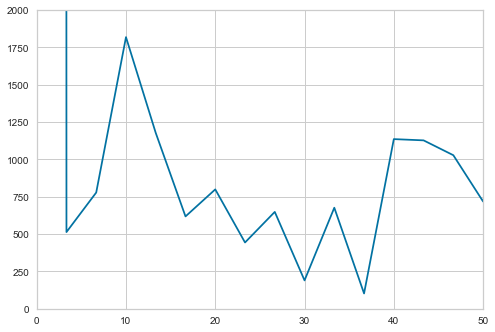

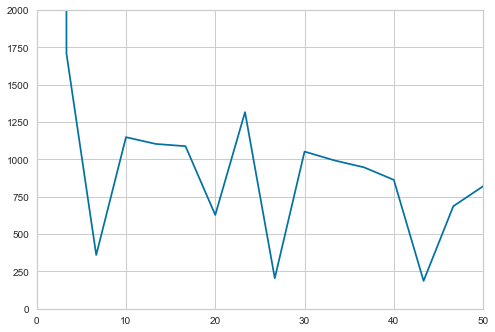

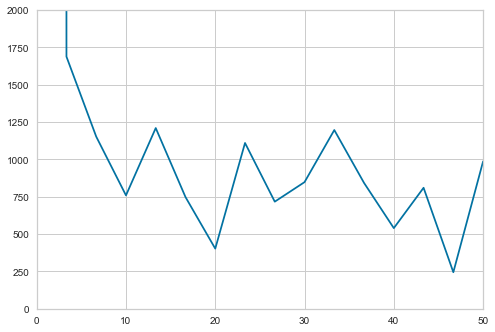

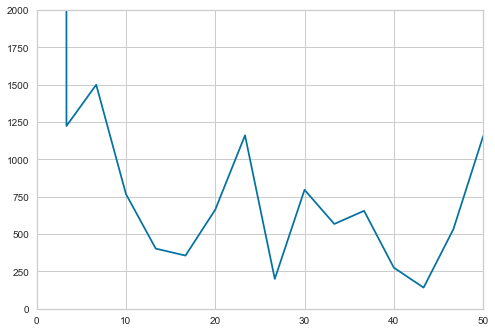

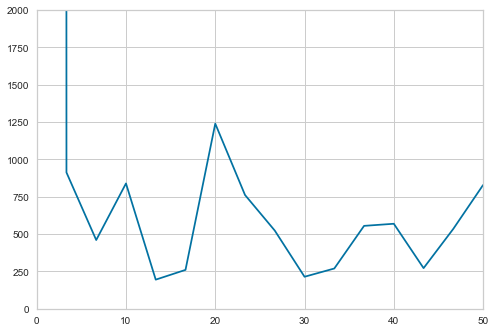

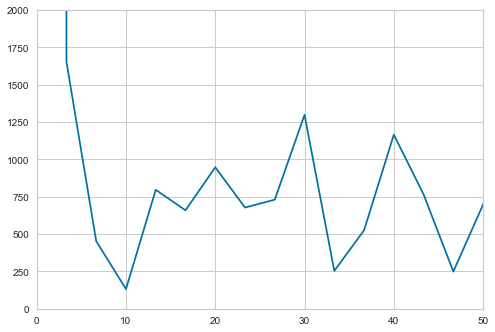

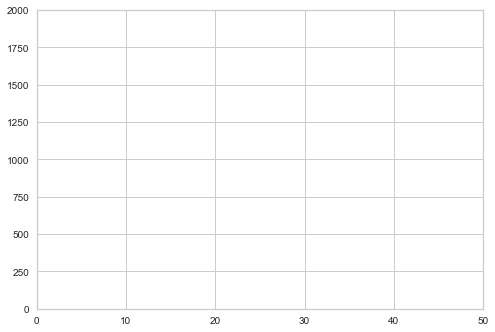

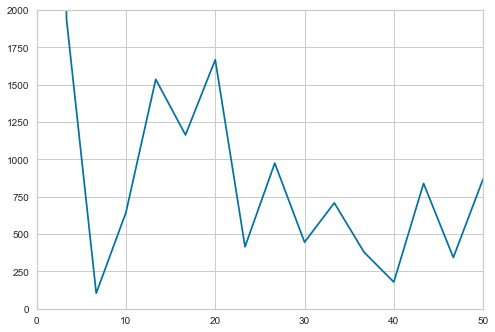

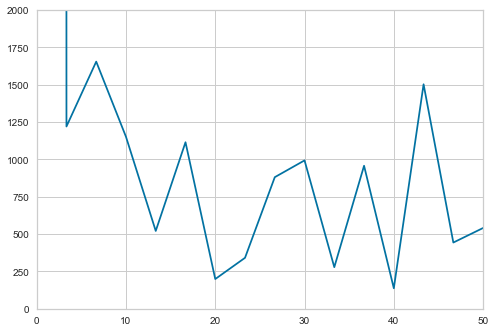

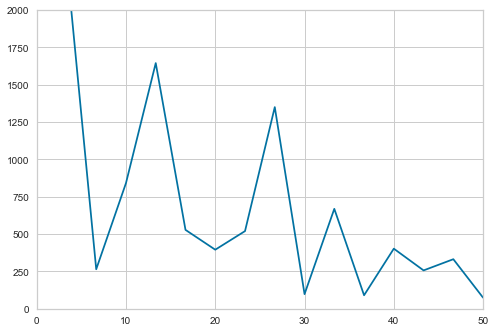

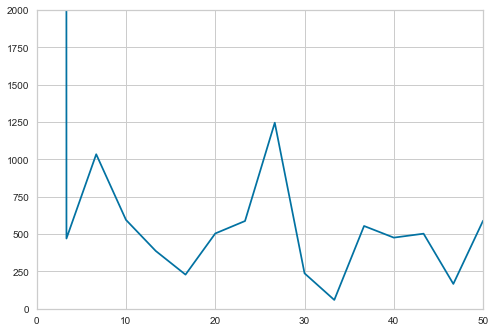

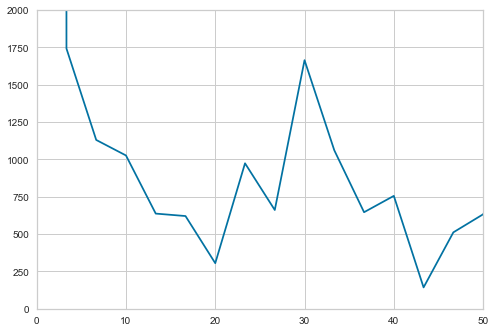

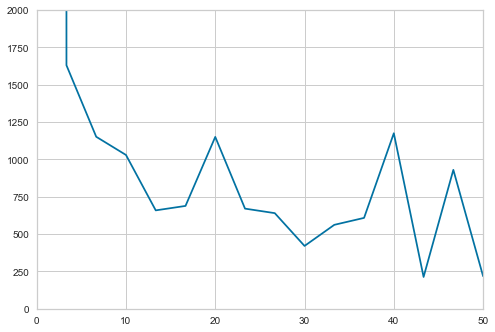

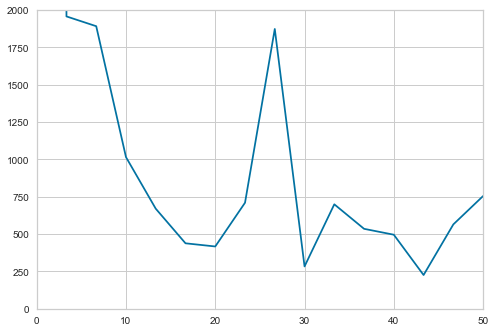

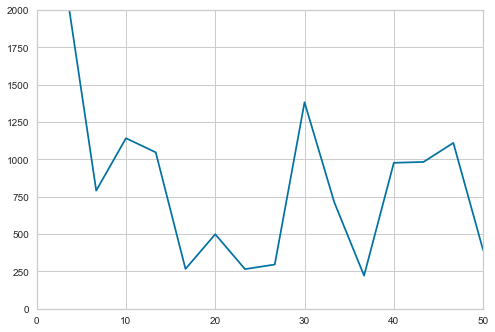

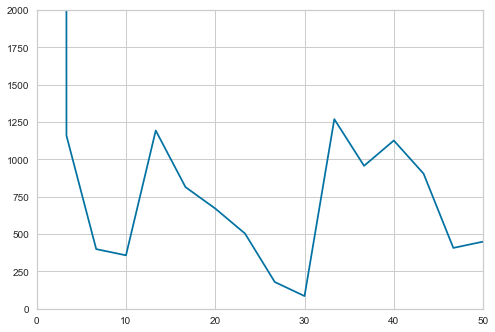

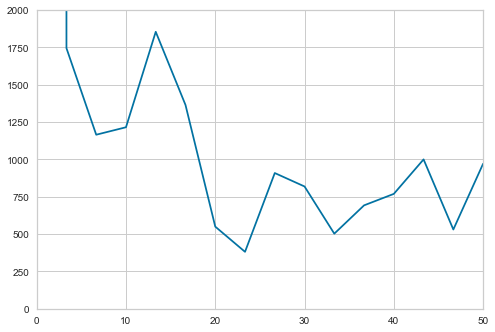

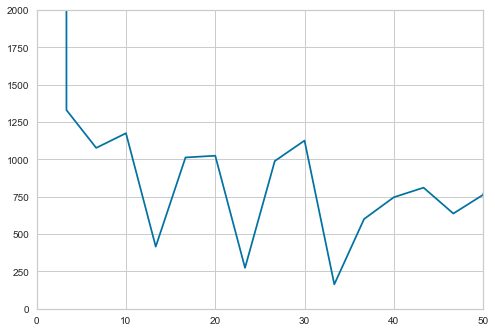

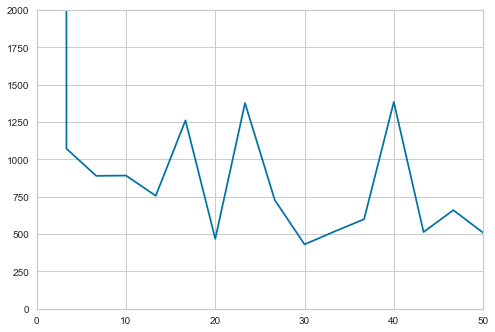

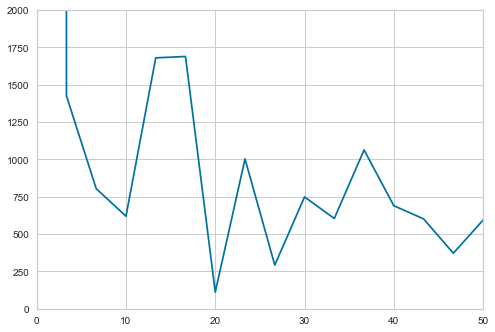

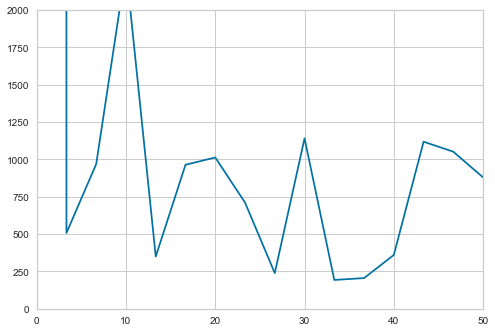

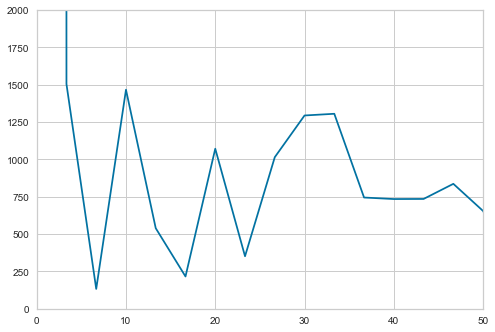

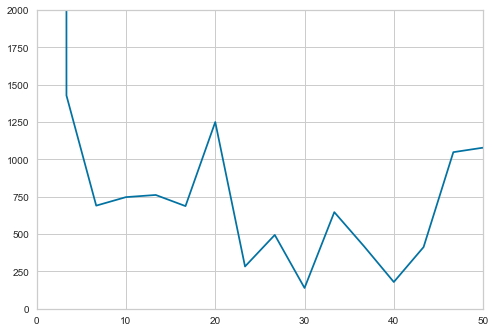

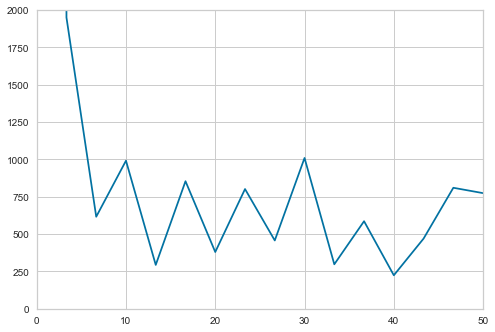

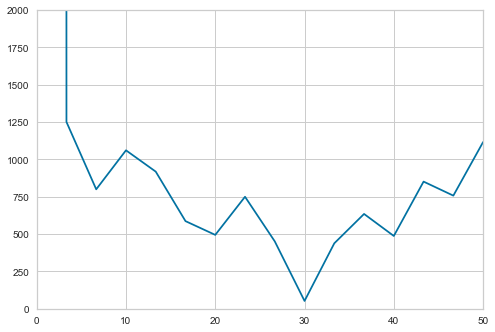

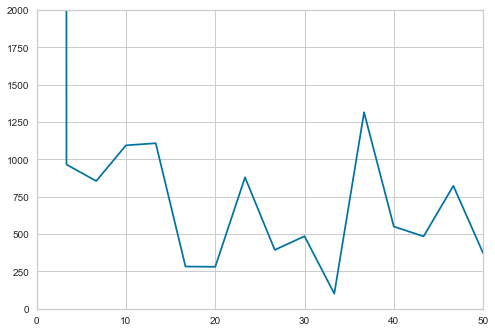

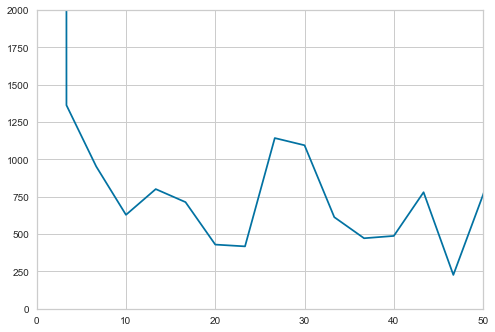

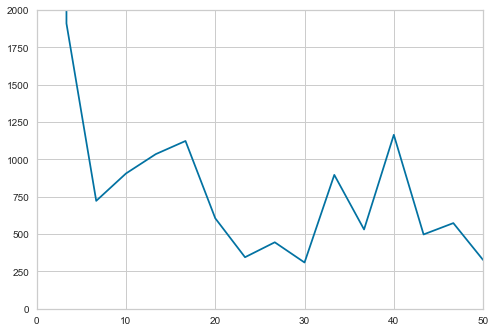

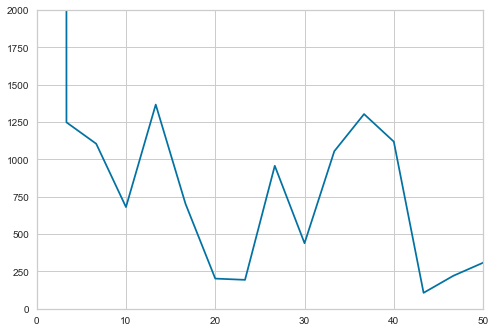

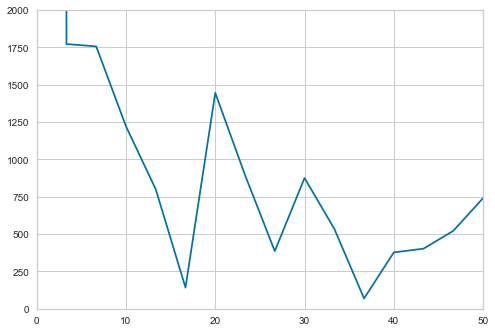

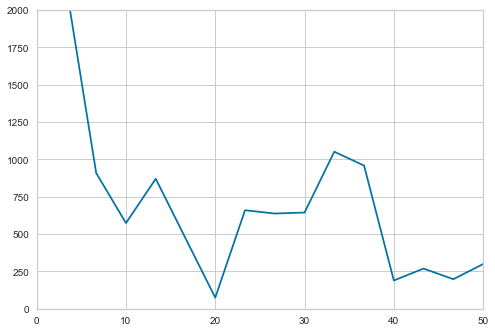

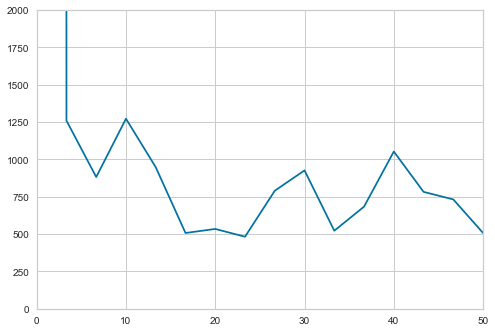

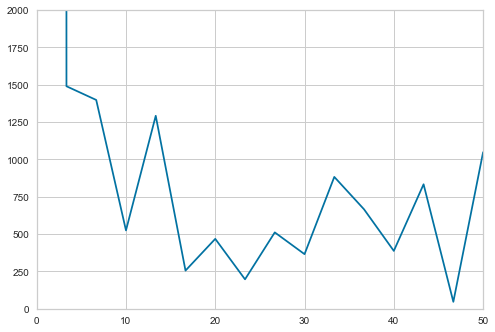

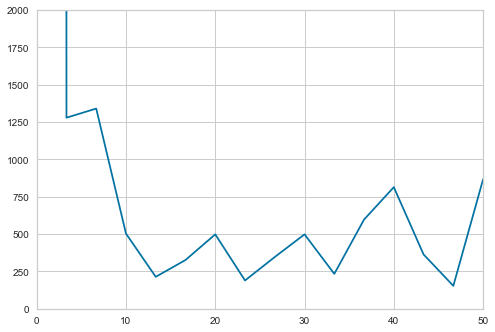

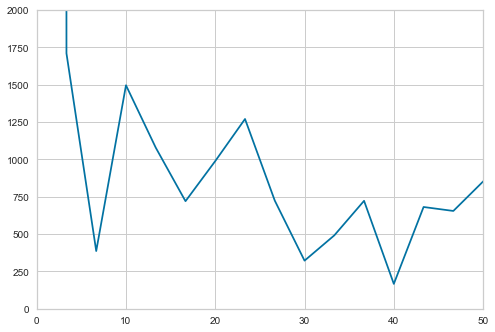

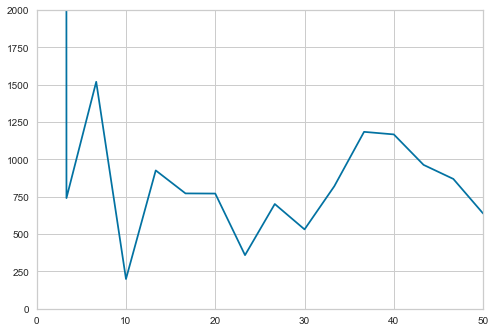

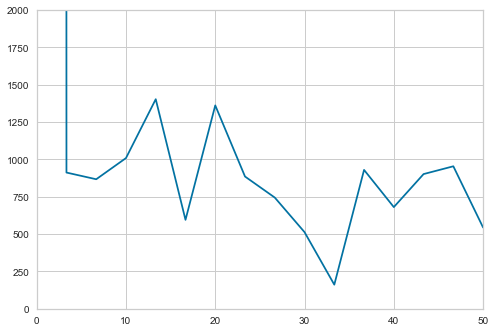

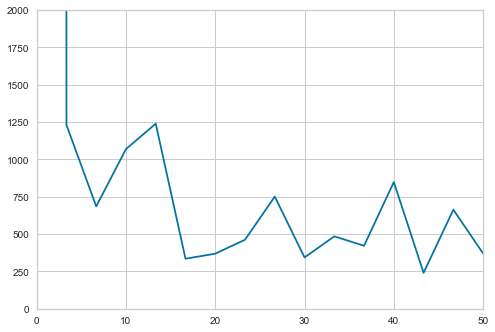

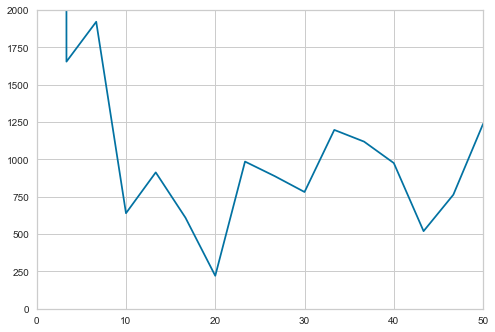

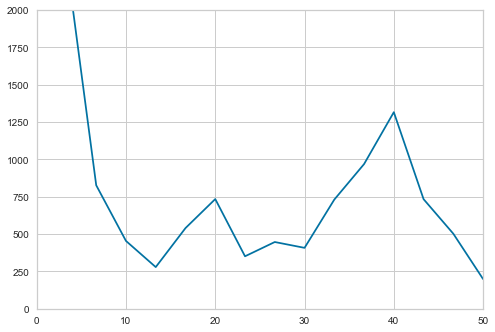

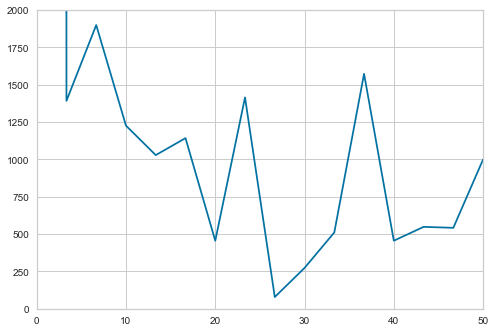

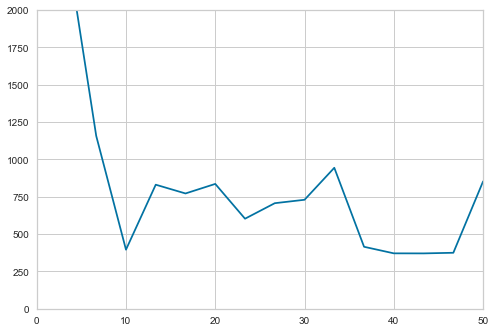

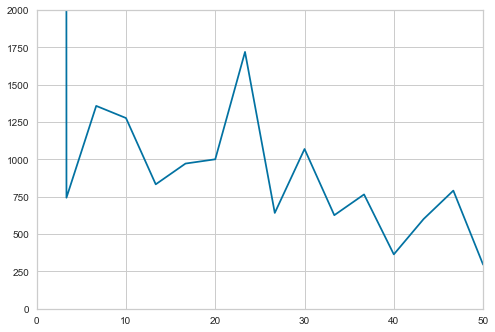

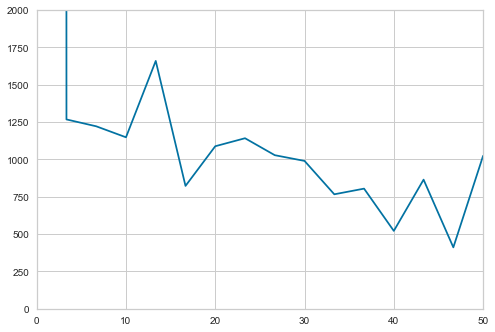

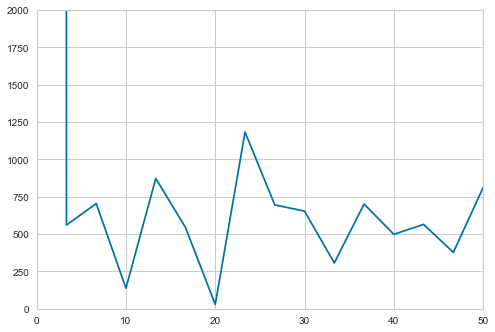

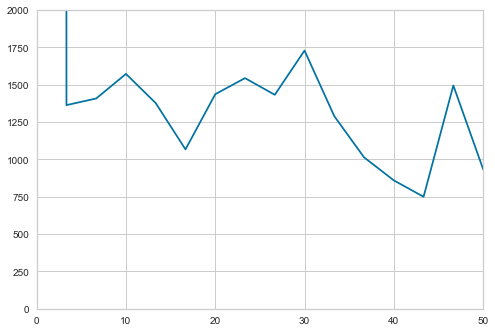

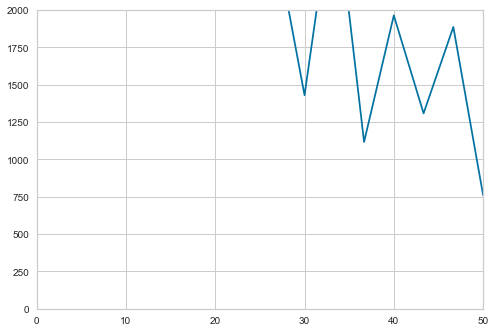

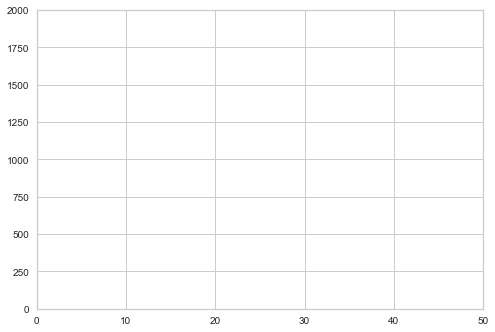

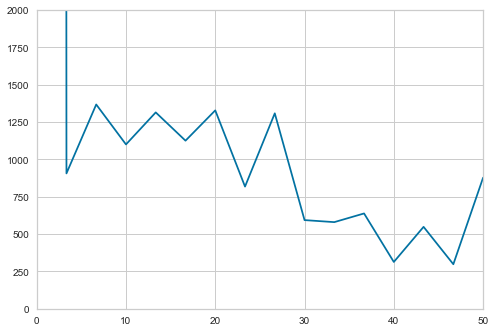

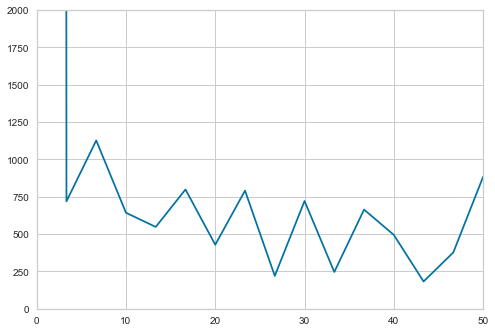

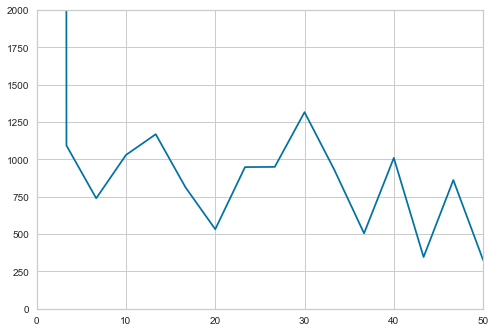

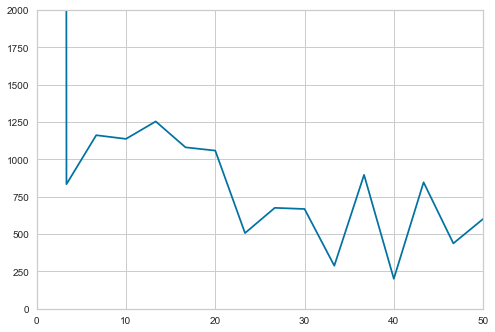

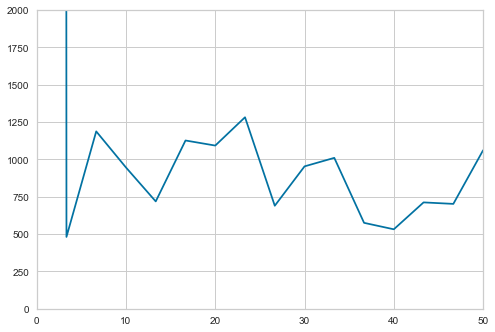

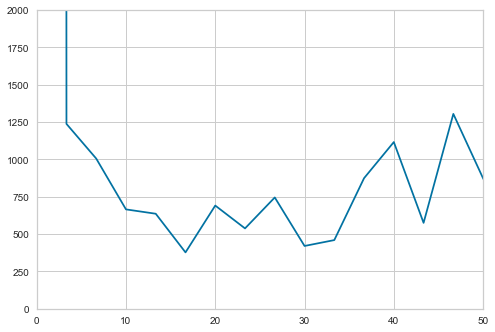

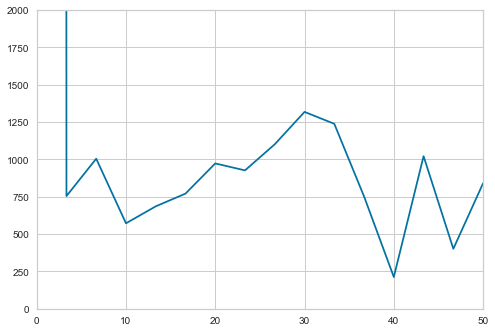

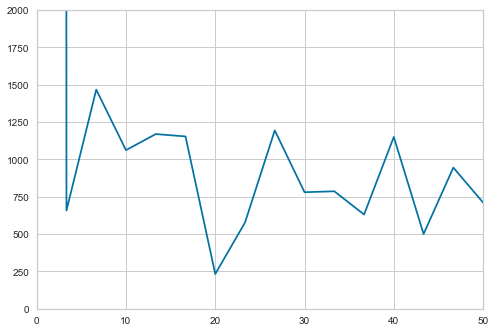

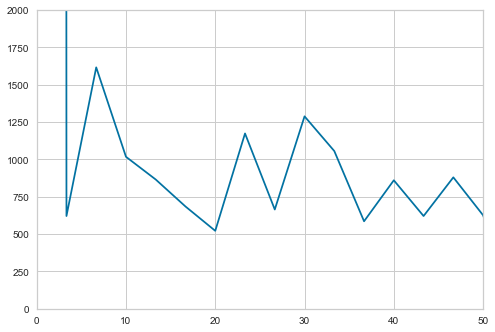

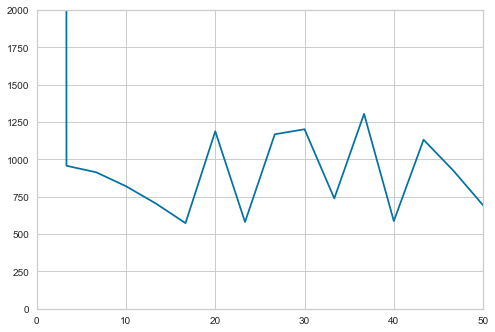

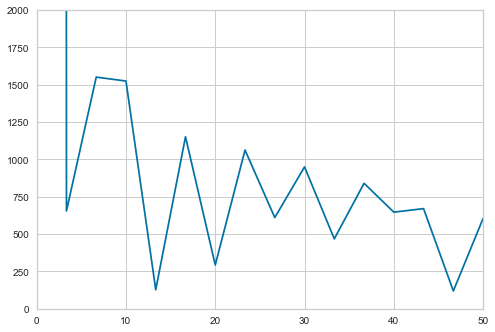

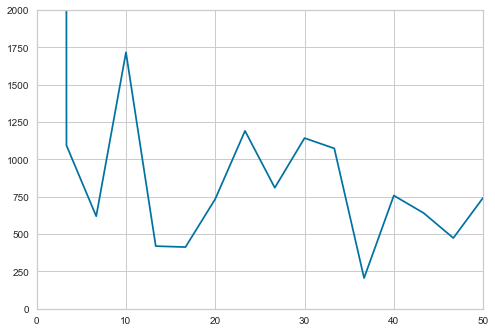

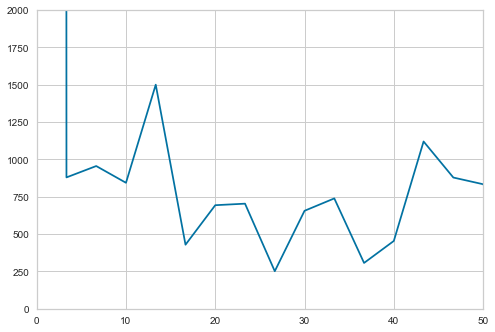

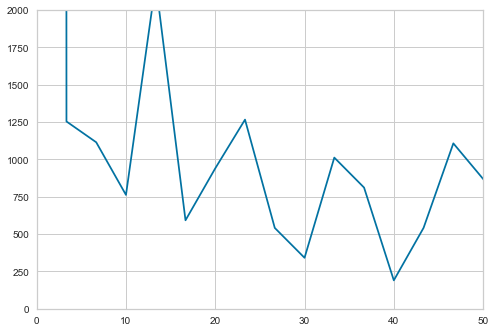

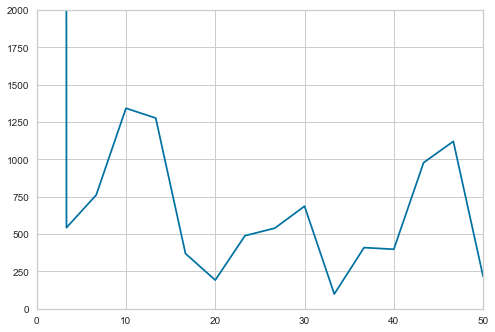

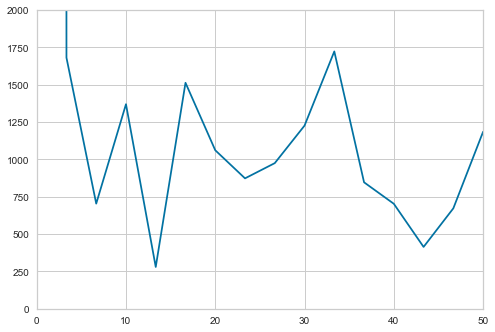

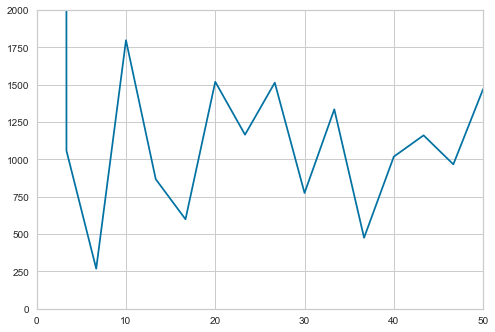

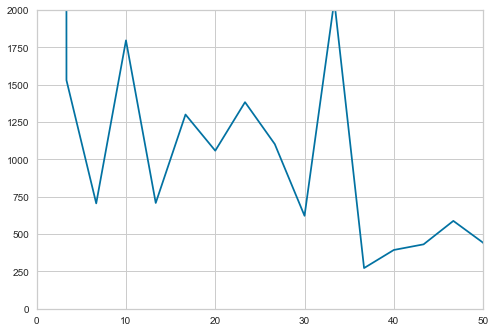

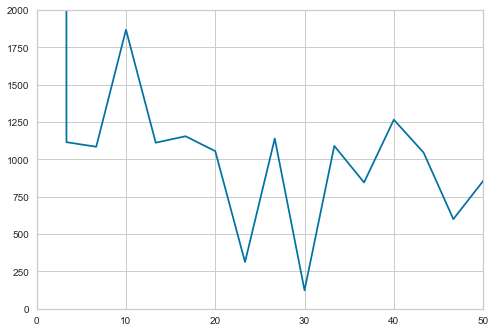

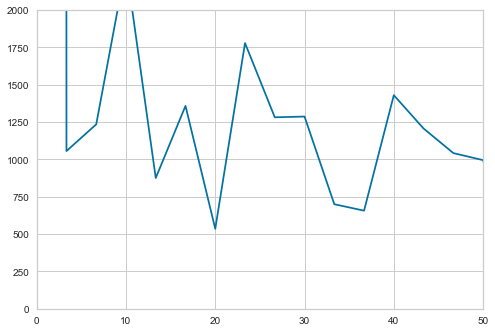

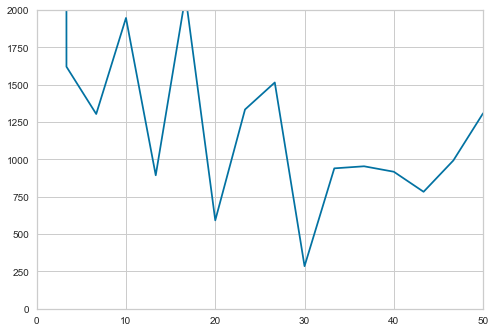

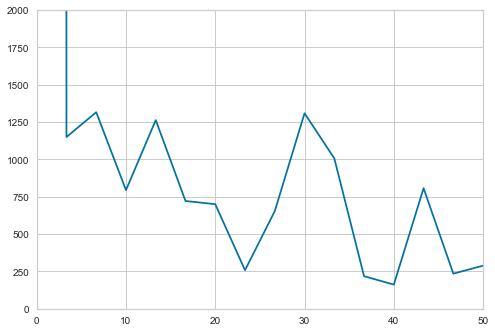

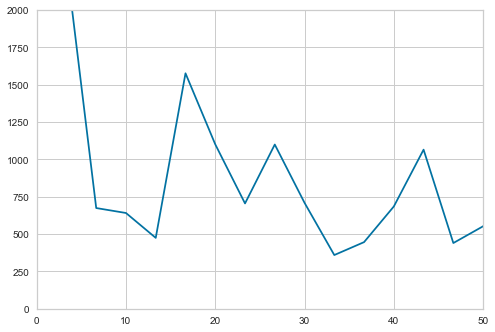

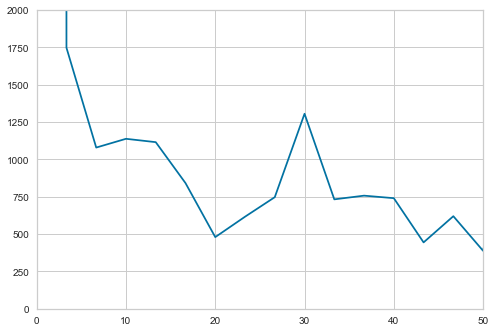

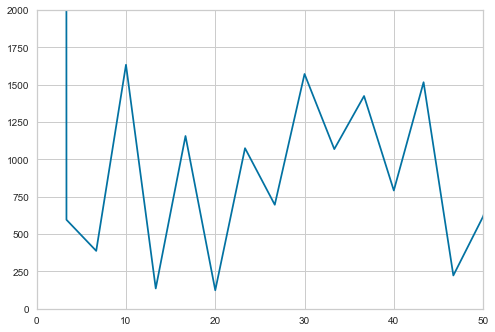

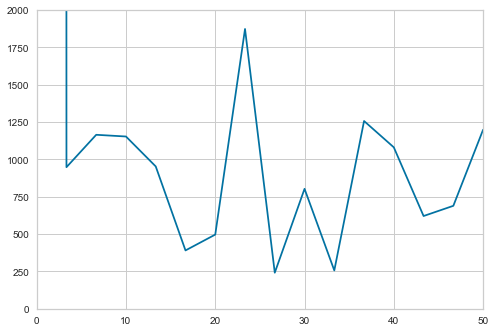

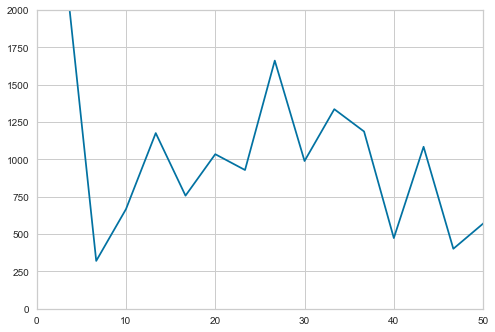

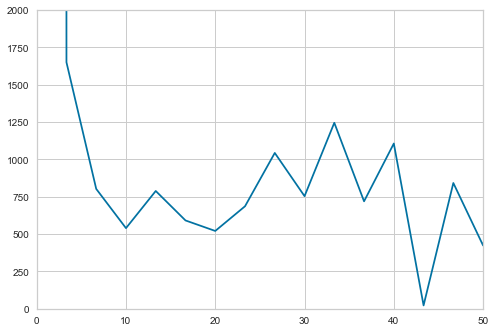

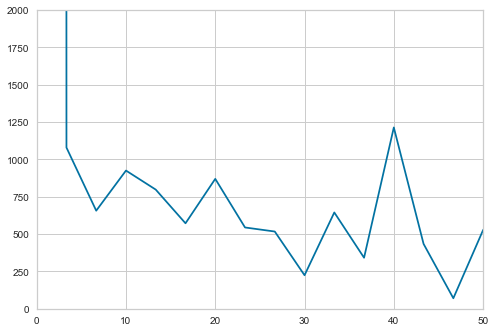

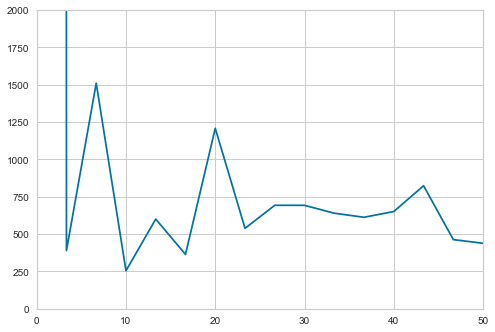

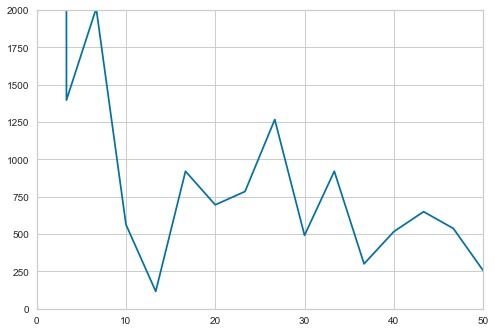

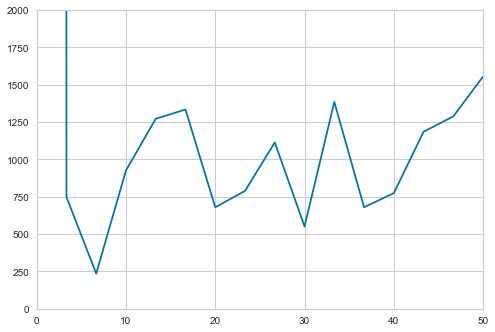

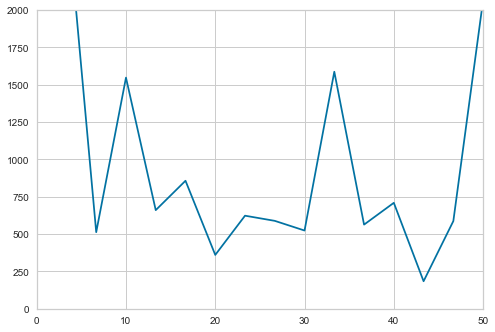

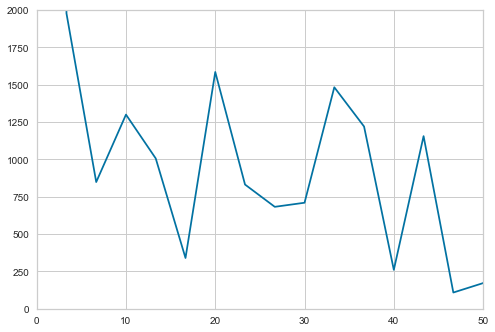

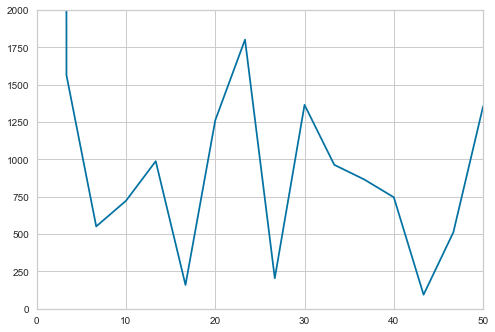

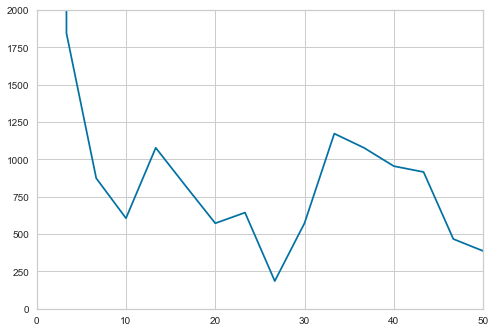

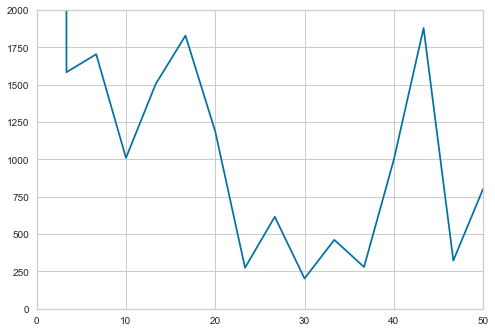

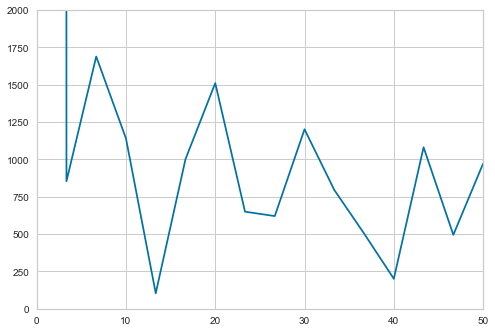

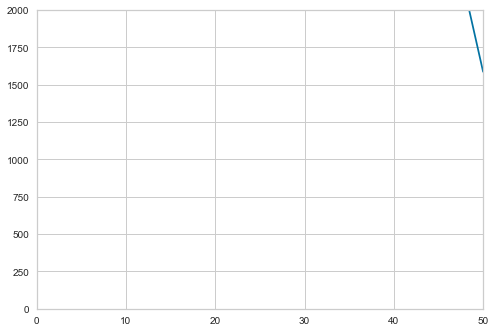

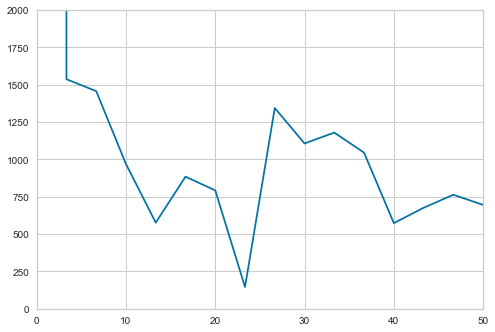

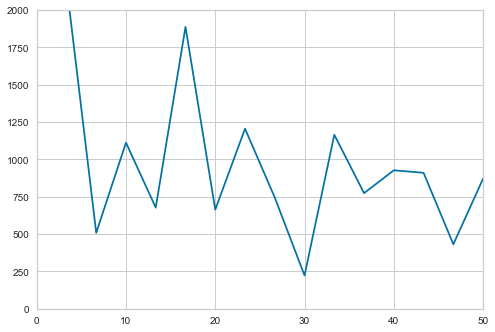

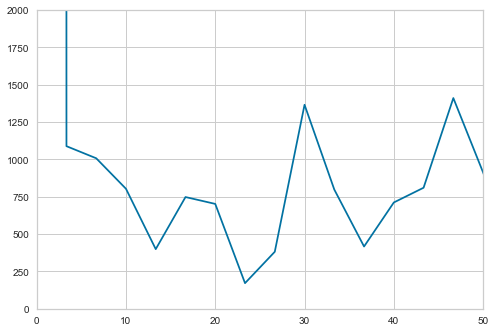

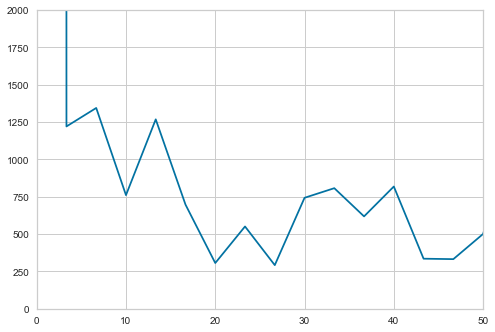

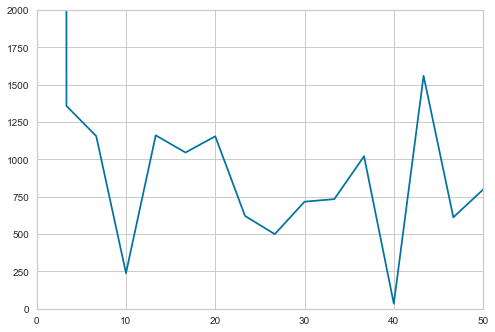

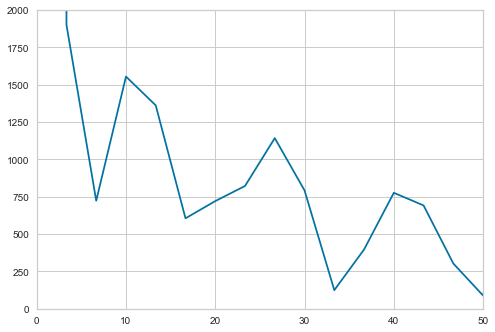

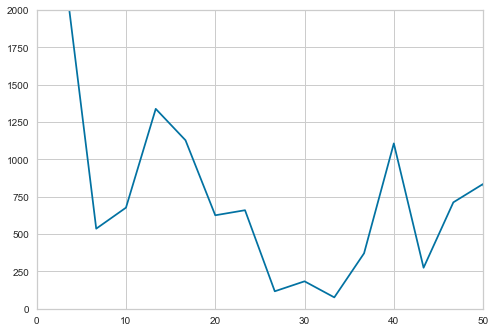

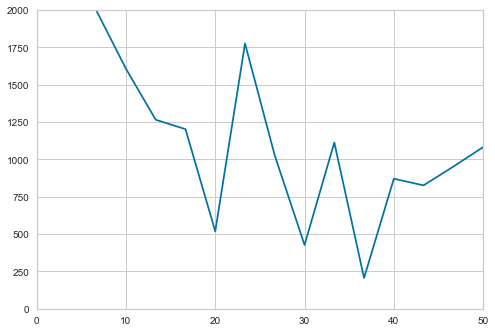

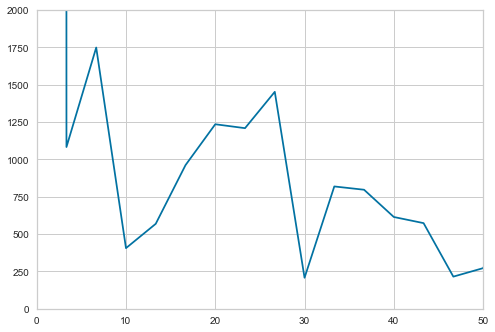

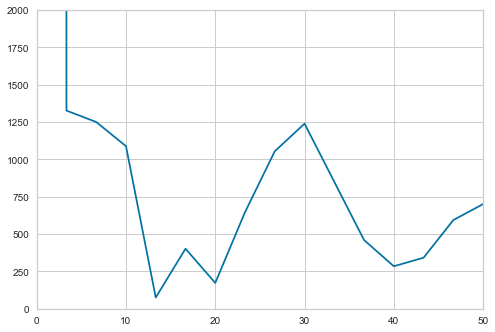

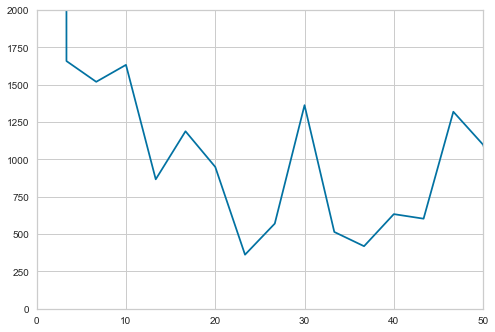

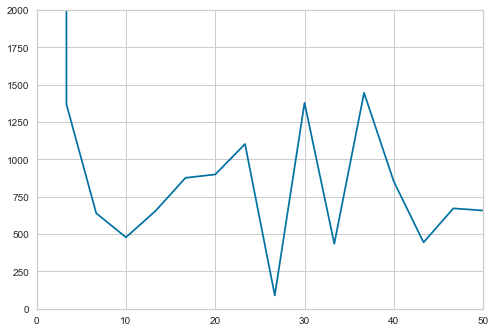

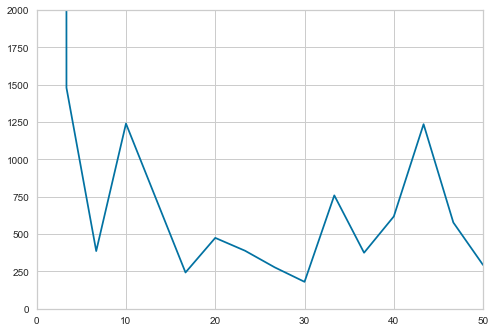

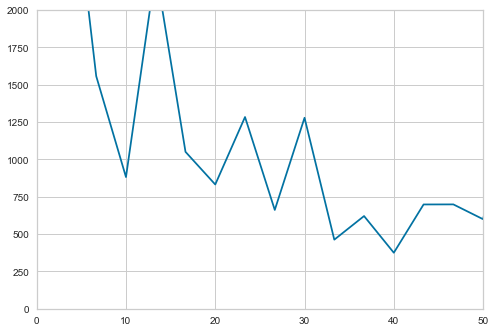

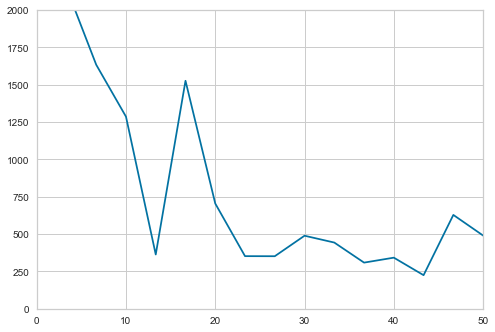

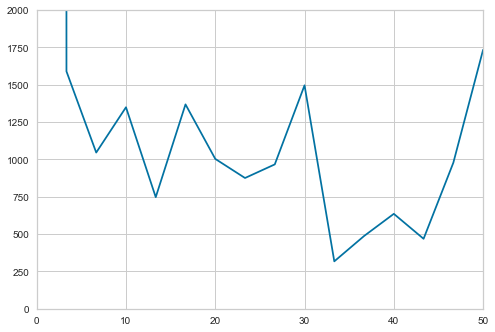

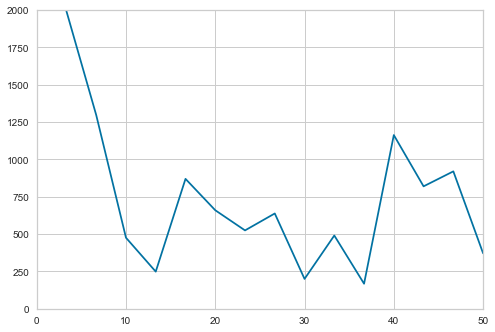

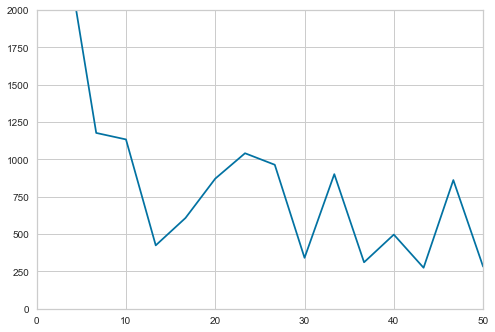

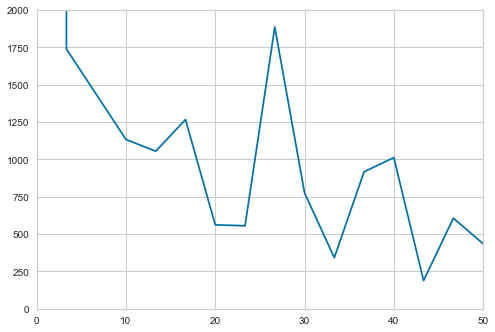

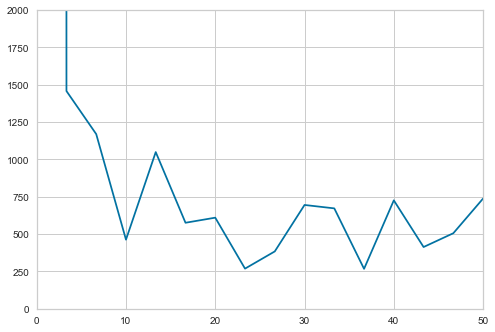

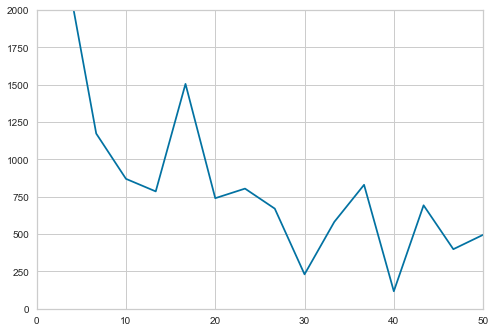

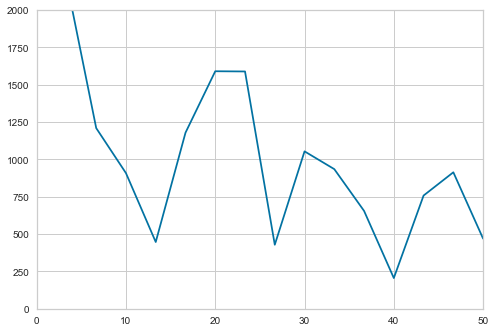

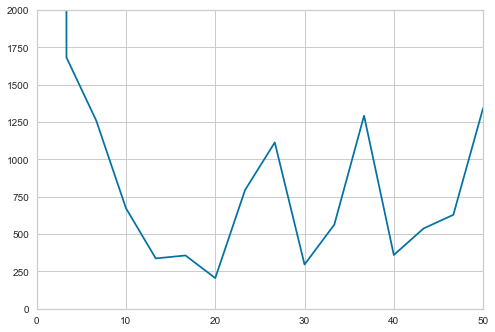

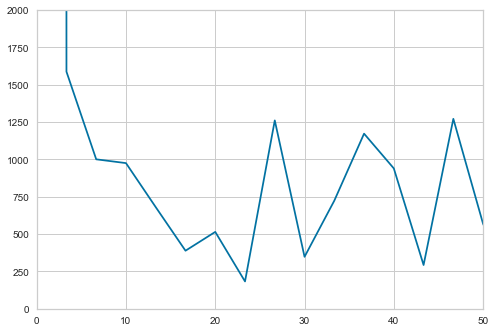

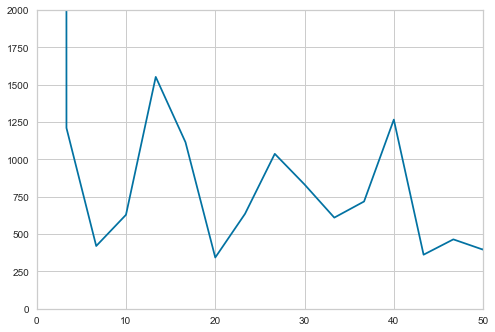

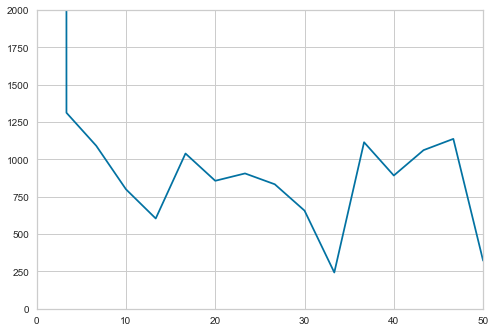

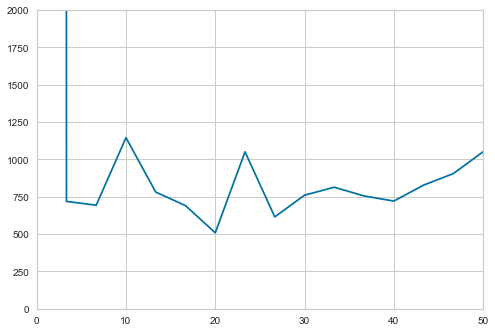

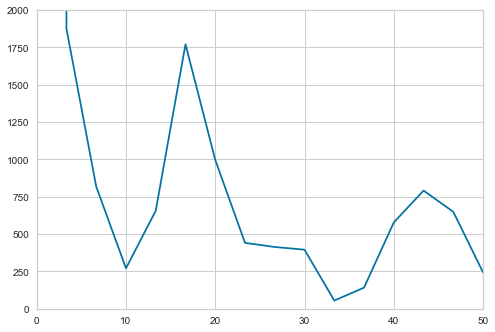

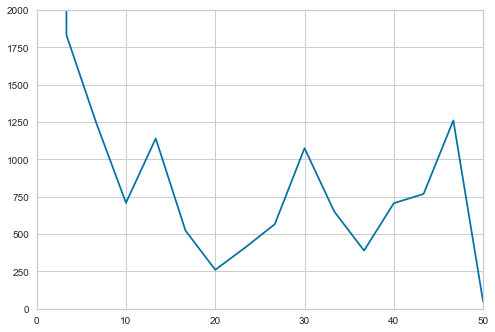

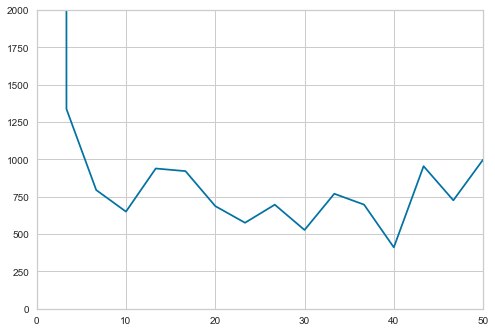

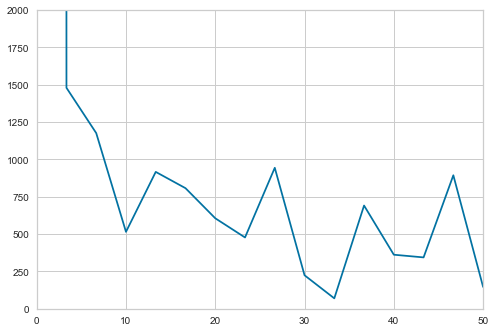

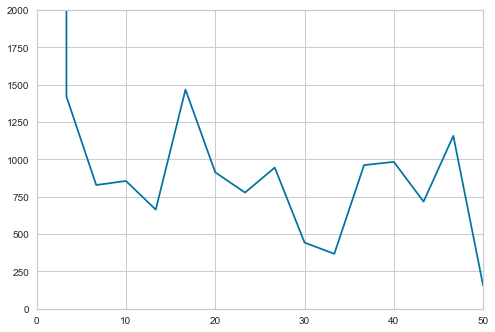

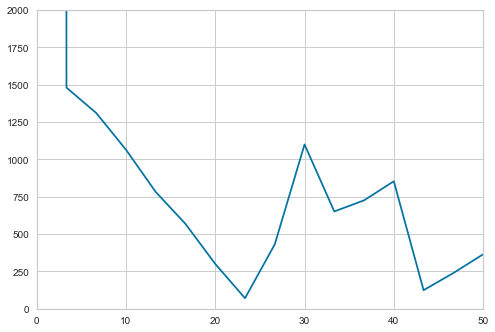

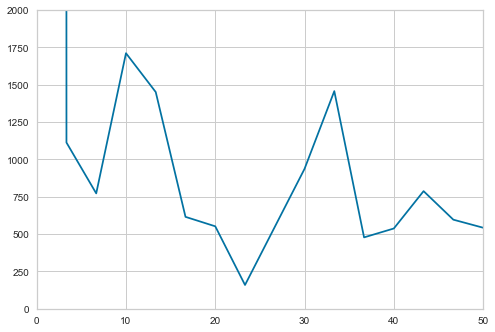

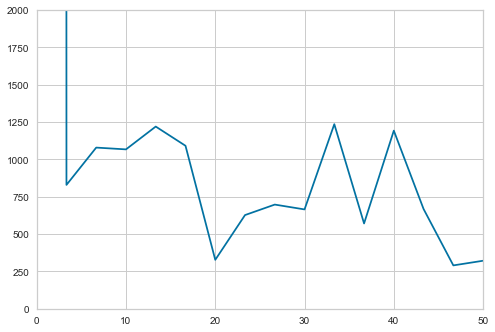

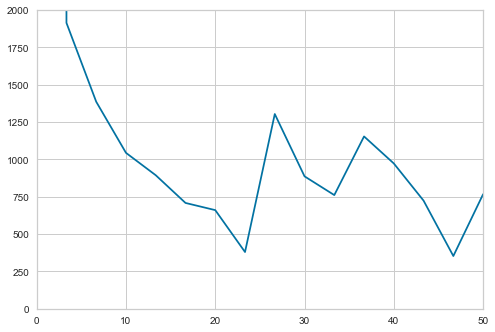

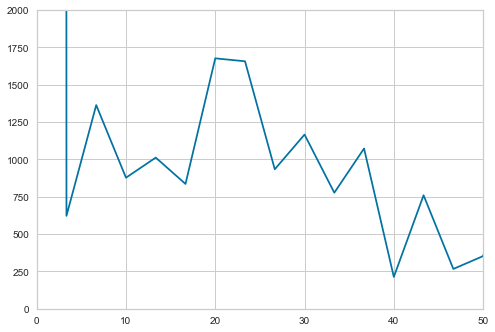

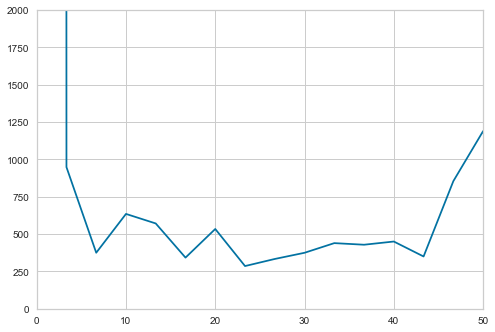

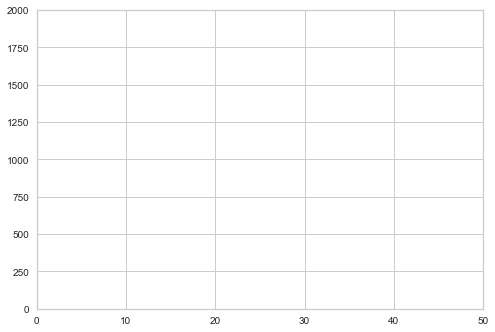

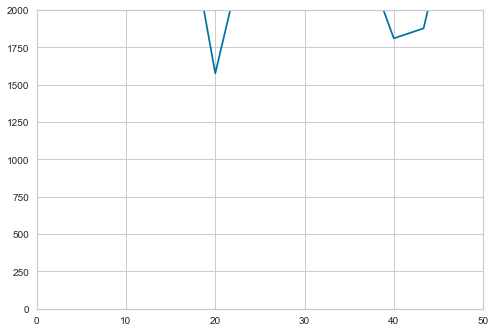

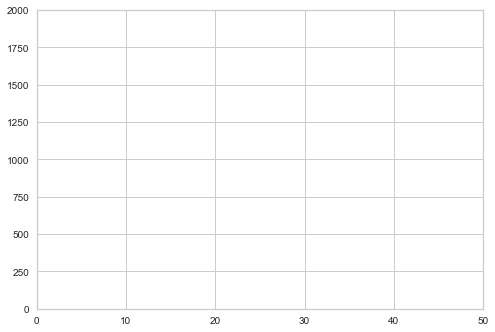

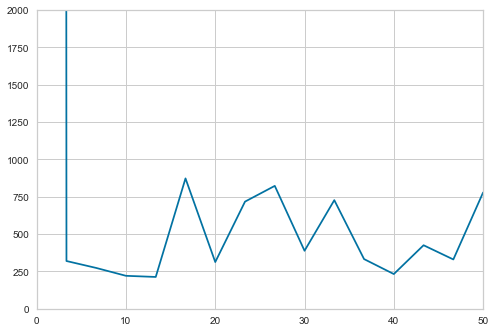

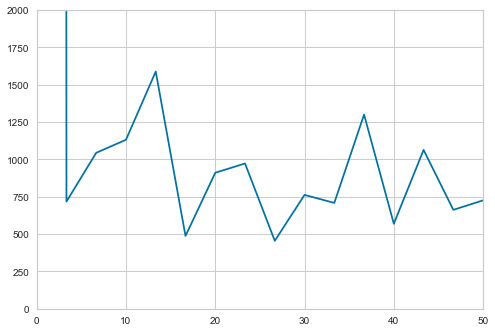

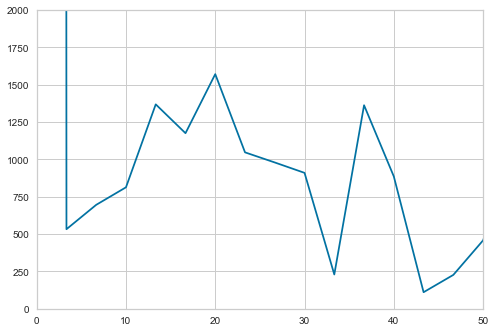

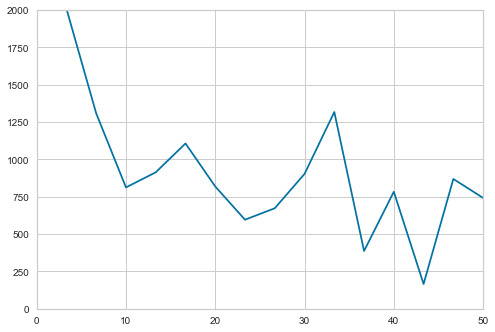

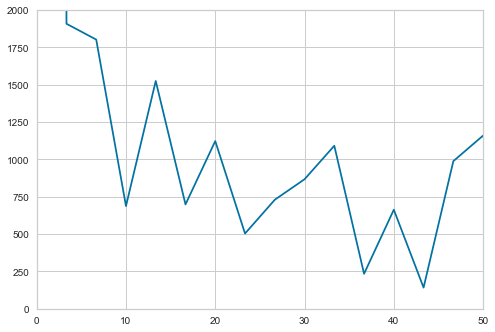

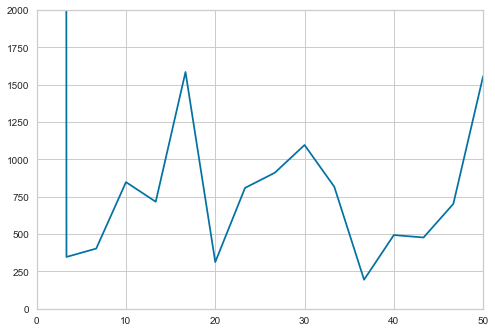

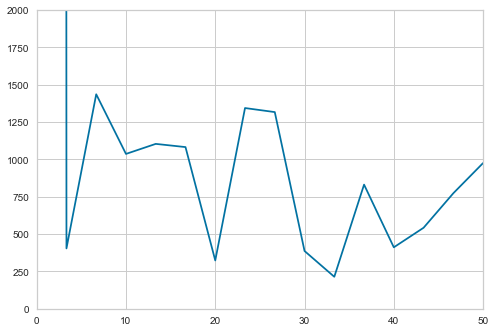

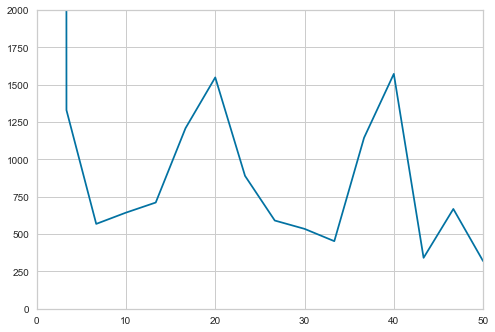

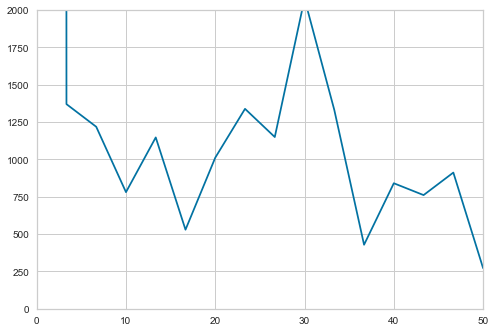

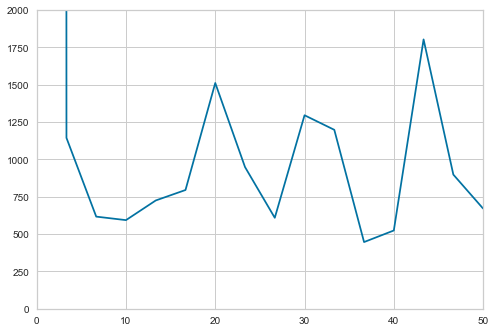

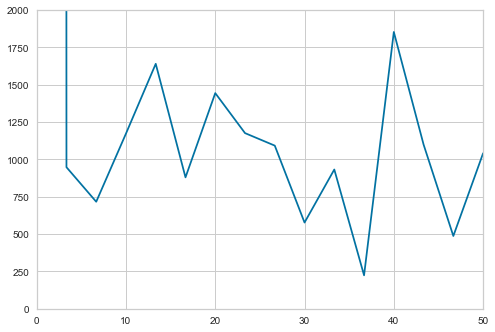

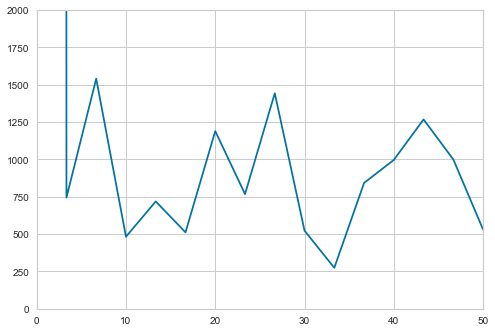

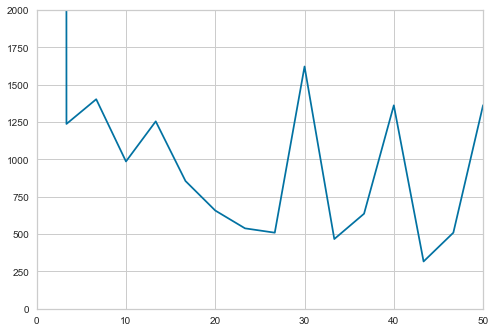

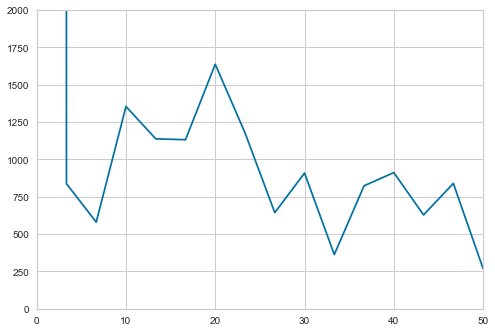

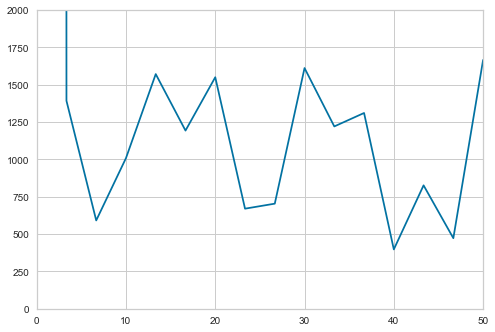

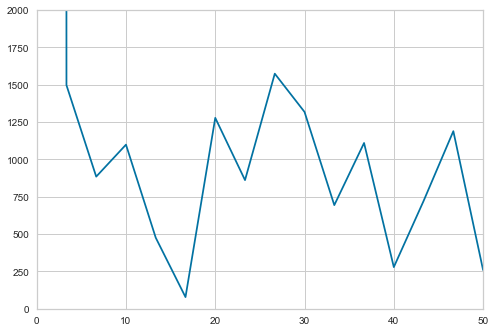

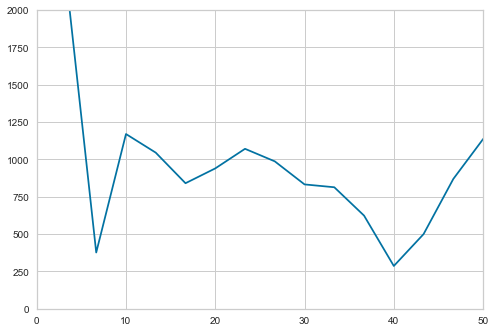

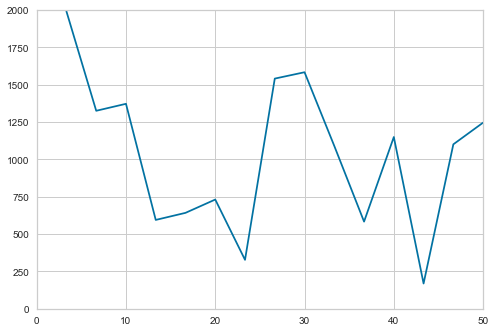

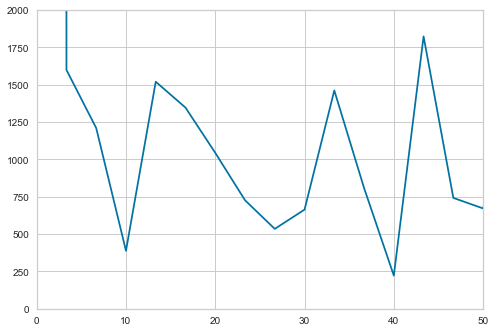

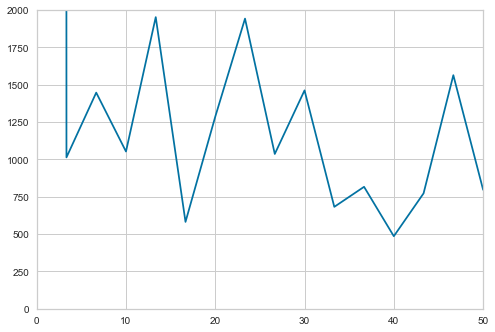

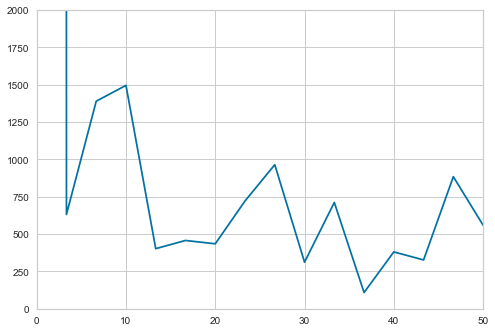

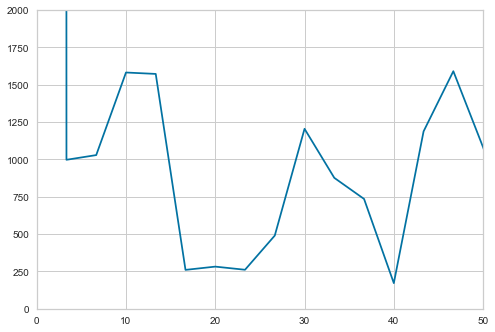

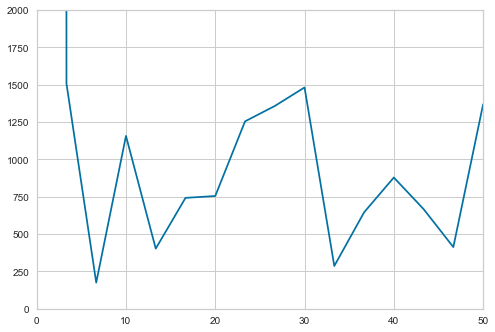

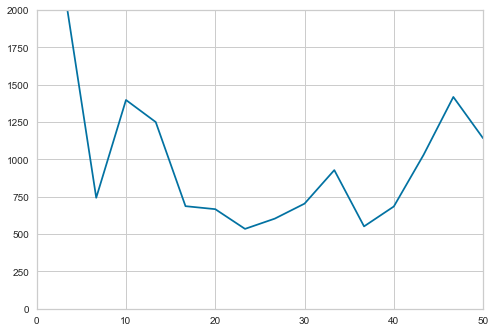

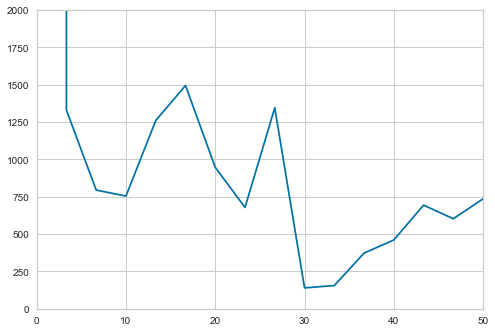

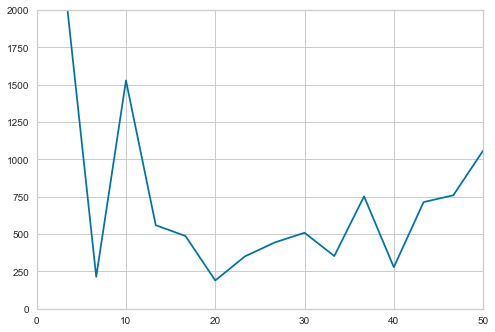

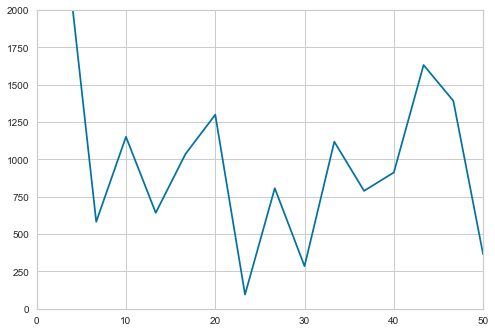

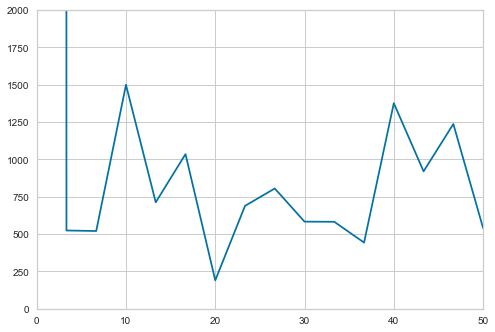

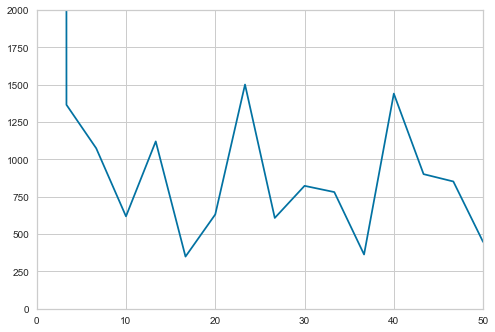

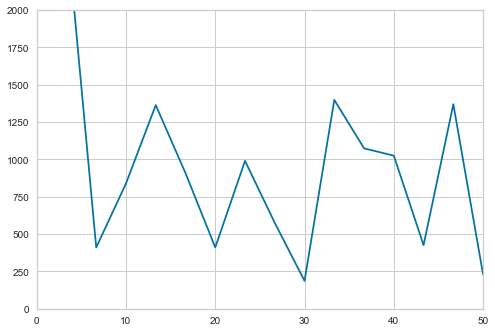

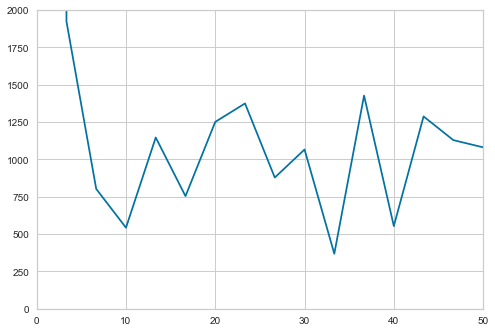

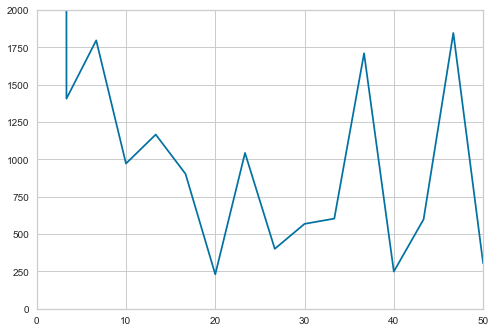

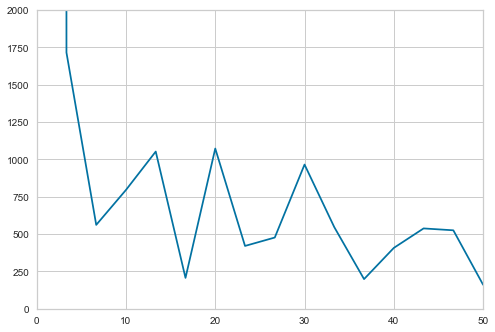

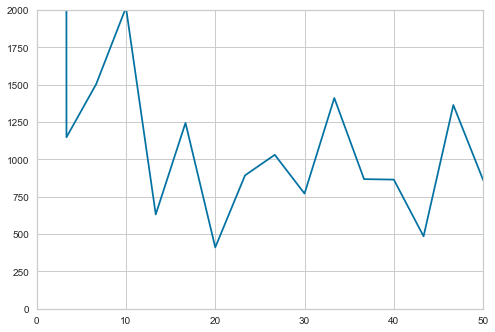

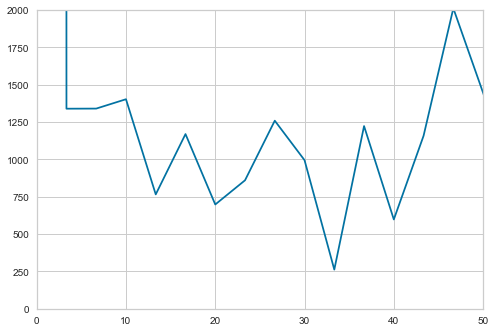

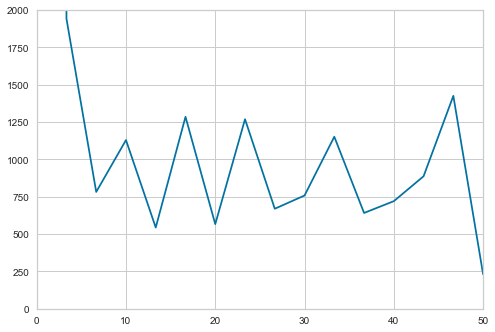

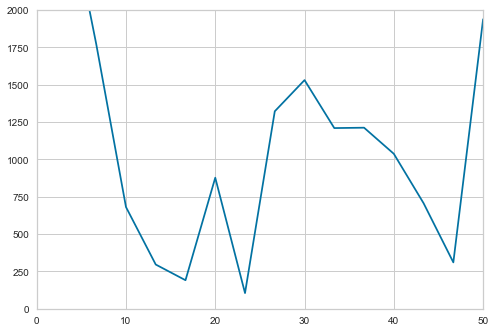

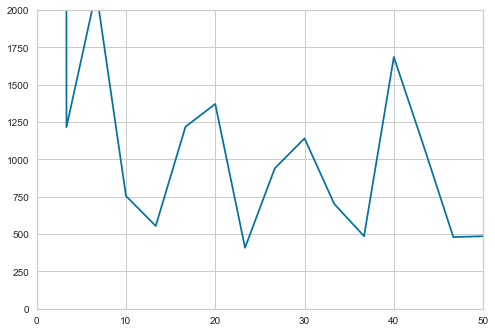

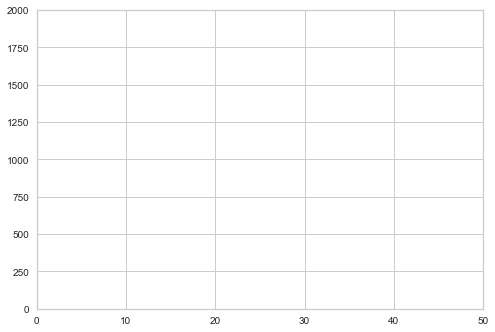

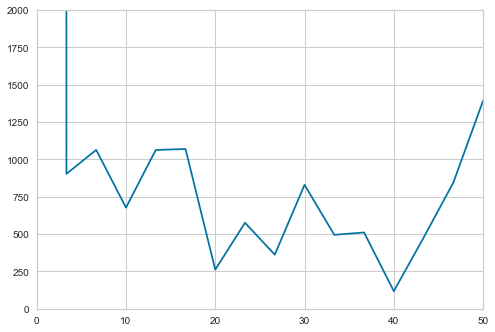

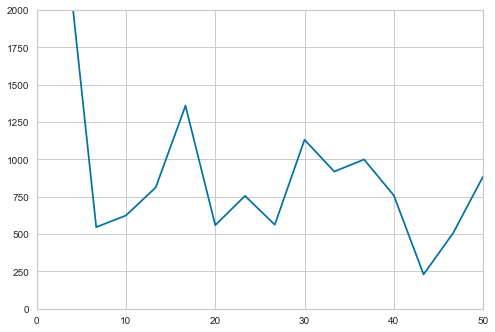

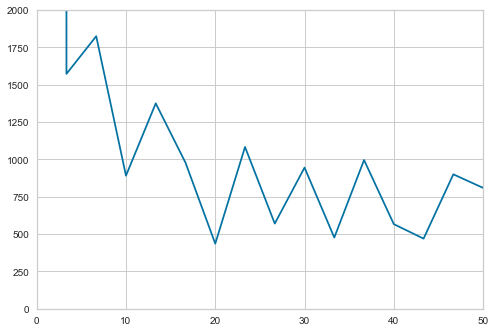

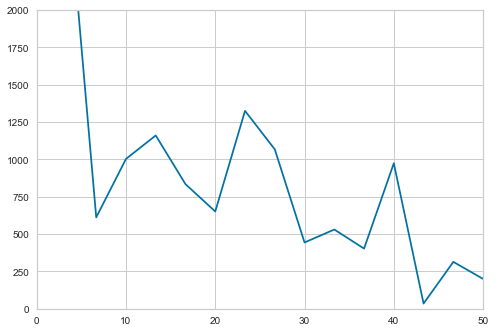

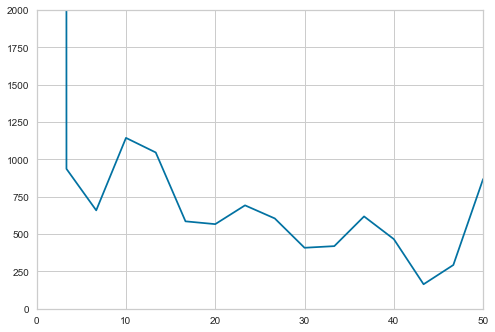

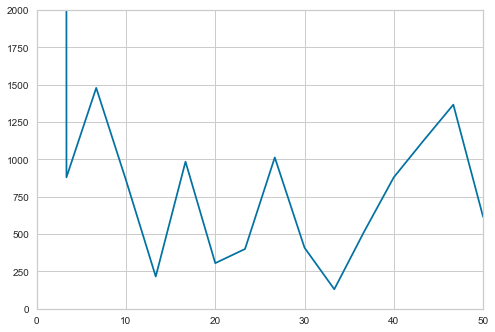

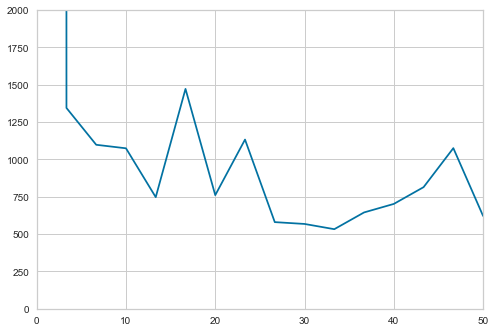

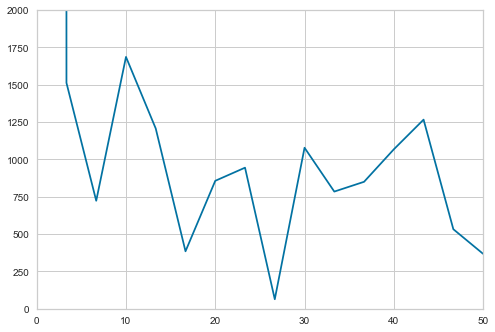

KeyboardInterrupt: 

In [4]:
# Frequency Decompositions
x_fft = compute_fft_binning(meta)
y_fft_avg = None
n = raw_data.shape[0] * raw_data.shape[1] * raw_data.shape[2]

for i in range(raw_data.shape[0]):
    for x in range(raw_data.shape[1]):
        for y in range(raw_data.shape[2]):
            
            y_fft = decompose_trace_frequencies(meta, 
                                                raw_data[i,x,y,:],
                                                x_fft=x_fft,
                                                lower_freq=0,
                                                upper_freq=50,
                                                y_max=2000)
            if y_fft_avg is None:
                y_fft_avg = y_fft / n
            else:
                y_fft_avg += y_fft / n

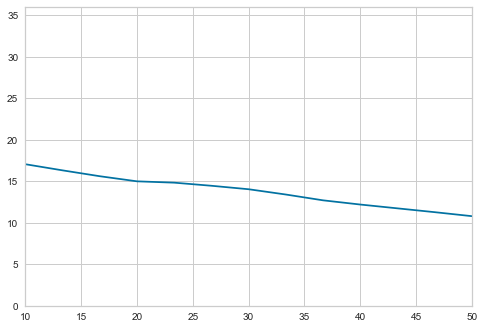

array([4.58746875e+00, 5.05899562e+00, 5.04614247e+00, 5.53015100e+00,
       5.41023851e+00, 5.36739495e+00, 5.33149460e+00, 5.54477711e+00,
       5.27325686e+00, 5.29277614e+00, 5.24625248e+00, 5.60966280e+00,
       6.02784606e+00, 5.56667826e+00, 5.34477847e+00, 5.75729410e+00,
       5.23165539e+00, 5.35470228e+00, 5.91977685e+00, 5.49596054e+00,
       5.28825995e+00, 5.36674500e+00, 4.93757453e+00, 5.23705461e+00,
       5.59607024e+00, 5.15118398e+00, 5.10120862e+00, 5.13850714e+00,
       5.05310732e+00, 5.45027371e+00, 5.09754574e+00, 5.35049358e+00,
       5.50987017e+00, 5.30808632e+00, 5.19020004e+00, 5.54017569e+00,
       5.69767738e+00, 5.54961109e+00, 5.65361596e+00, 5.39814204e+00,
       5.52371967e+00, 5.36621529e+00, 5.18850640e+00, 5.54268416e+00,
       4.90220625e+00, 5.21463604e+00, 5.16924896e+00, 5.17915587e+00,
       5.23998341e+00, 5.03980442e+00, 5.06051209e+00, 5.05213431e+00,
       5.12340412e+00, 5.28380619e+00, 5.04356426e+00, 5.31963178e+00,
      

In [8]:
# Mean frequency decomposition (averaged by frequency over all pixels)
plt.plot(x_fft, 
         np.abs(y_fft_avg), 
         label="Average Frequency Decompositition")
plt.xlim([10, 50])
plt.ylim([0,36])
plt.show()
y_fft_avg

In [ ]:
# Average only for high-SNR and/or ROIs
# .... TO DO
